# Analyzing Neural Time Series Data: Chapter 13

#### Converted from MATLAB to Python by Andrew J. Graves on 02/27/20

In [1]:
# Get matplotlib magic
%matplotlib notebook 

# Import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from cmath import polar
from math import ceil, floor
from IPython.display import Javascript
from mpl_toolkits.mplot3d import Axes3D # For 3d visualization

# Run data extraction and useful function script; double quotes work for Windows and Mac paths
%run "data_and_funcs.ipynb"

# AJG functions
# help(find_nearest)

### Figuer 13.1

<IPython.core.display.Javascript object>


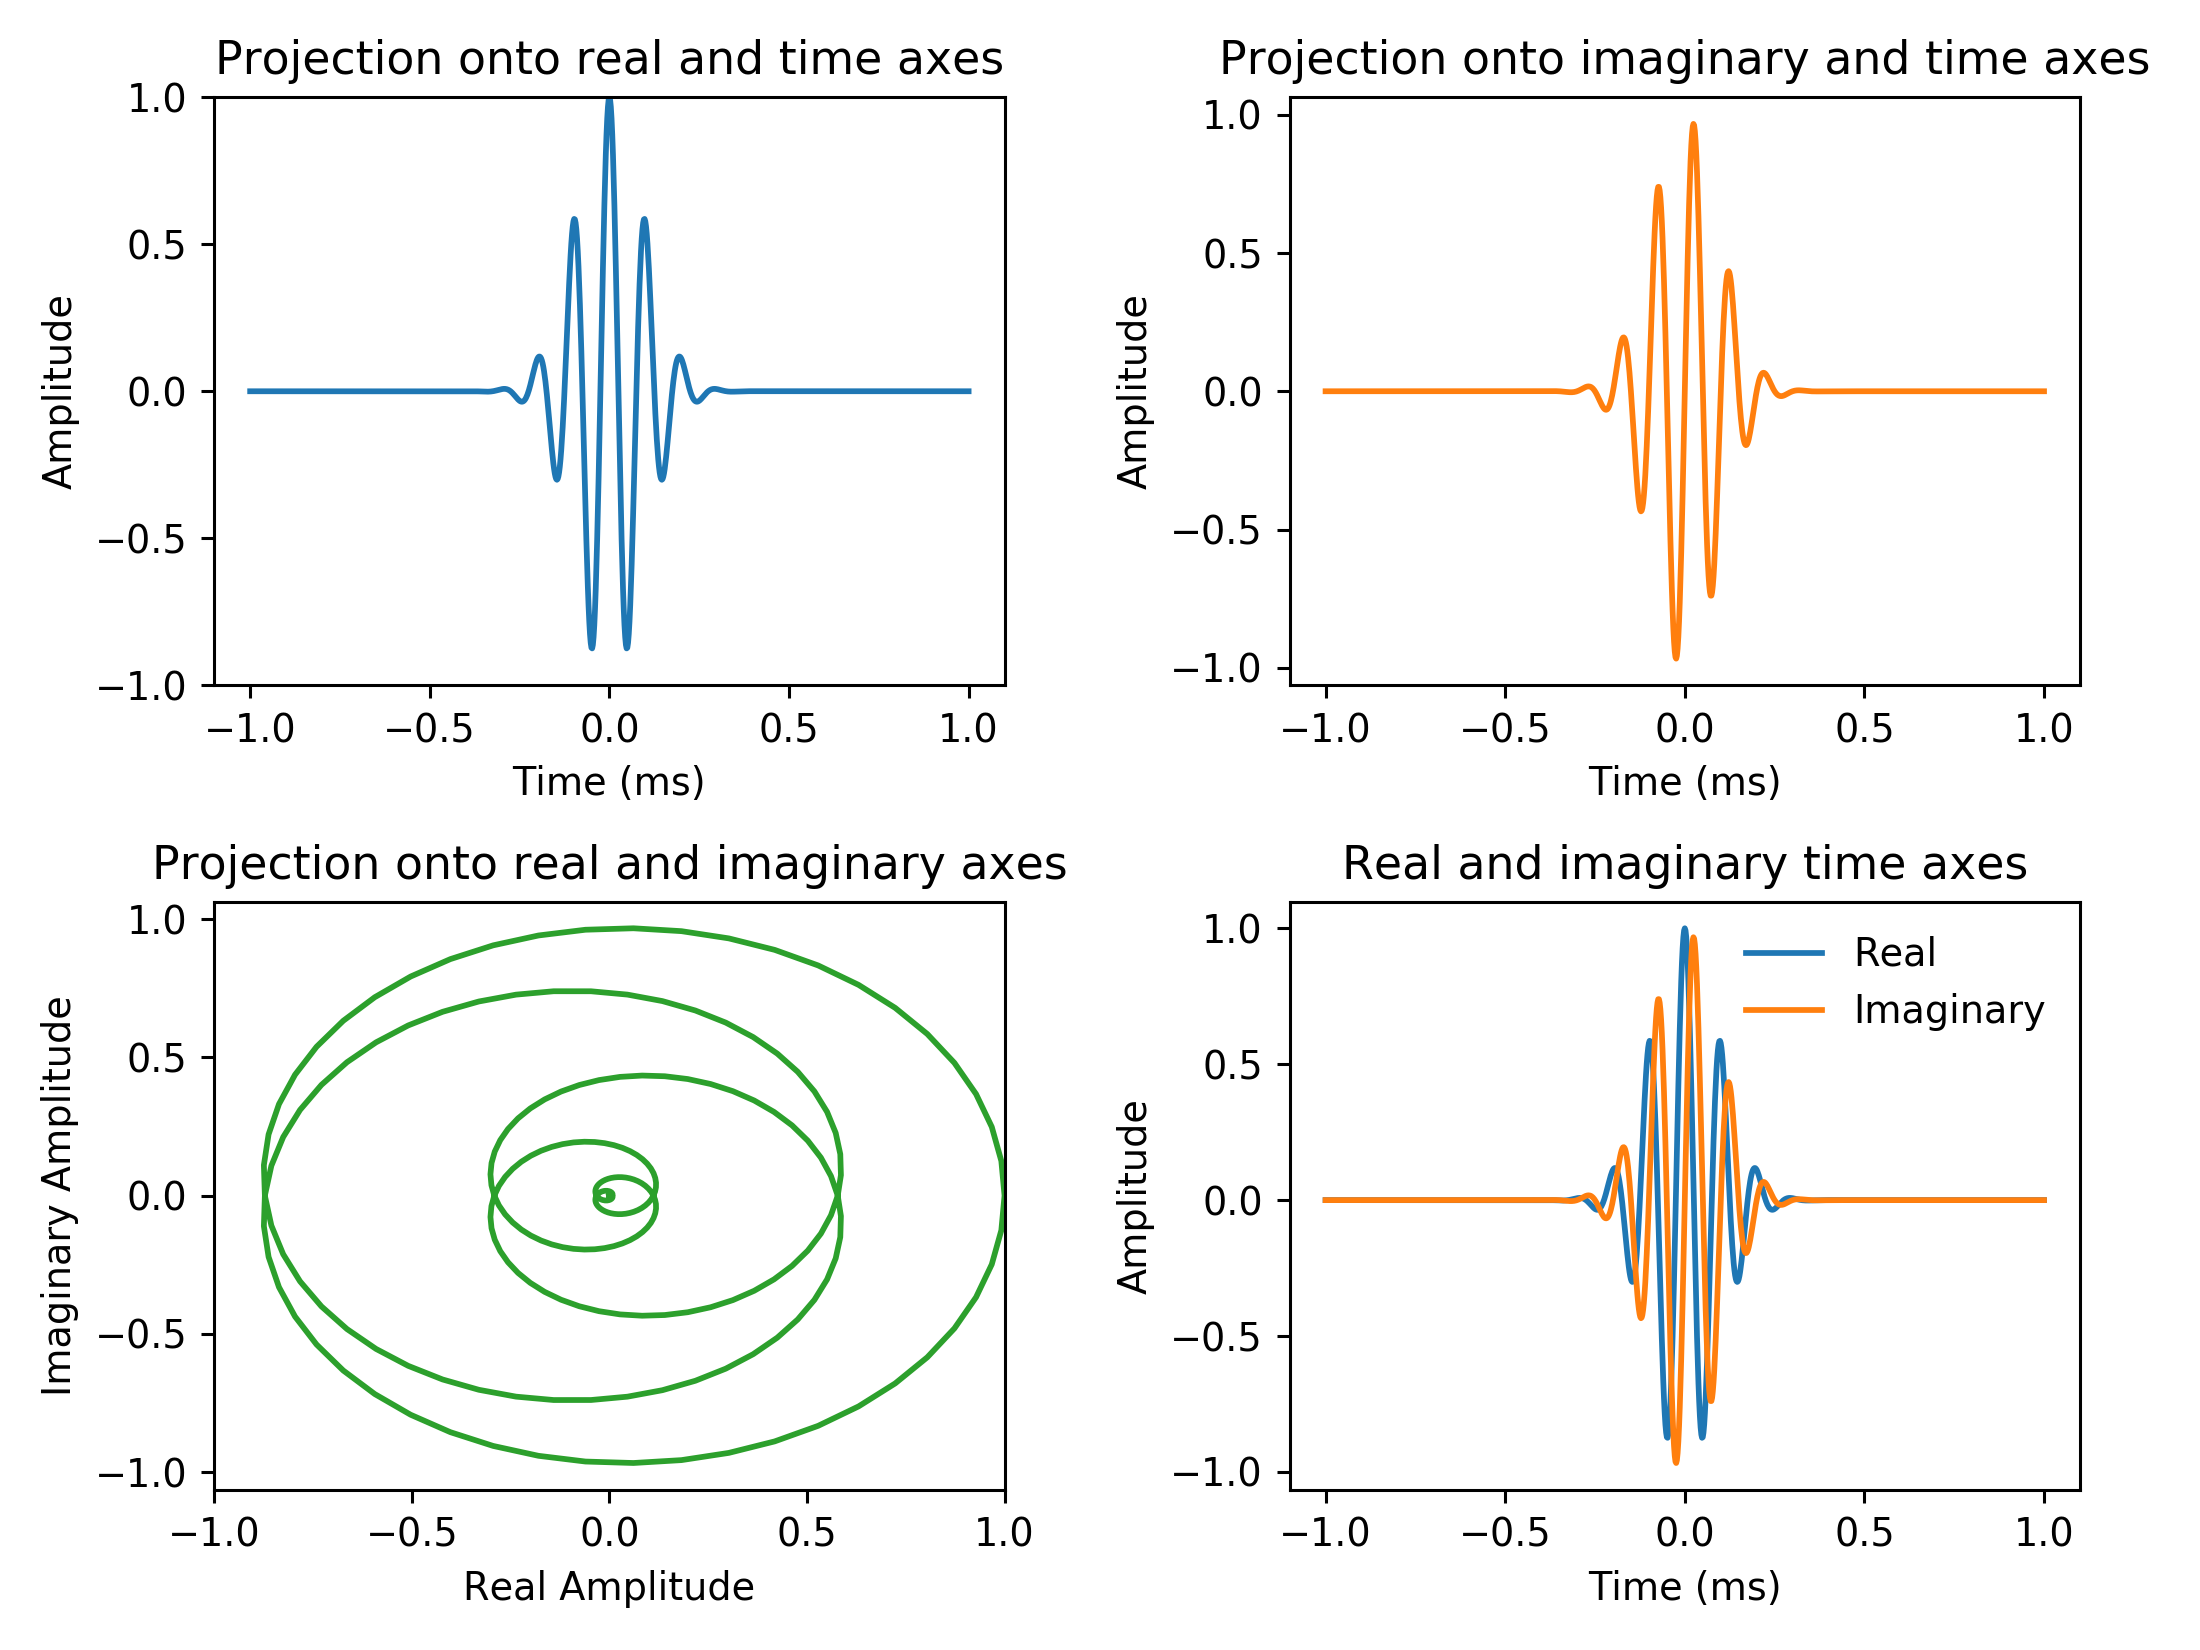

In [2]:
# Parameters for wavelet
srate = 500
freq = 10
n_cycles = 6
time = time_series(srate)

# Multiply sine wave by Gaussian window to generate wavelet
wavelet = get_sine_wave(freq, srate, complex_wave=True) * gauss_win(freq, srate, n_cycles)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

axs[0, 0].plot(time, np.real(wavelet))
axs[0, 0].set_ylim([-1, 1])
axs[0, 1].plot(time, np.imag(wavelet), color='C1')
axs[1, 0].plot(np.real(wavelet), np.imag(wavelet), color='C2')
axs[1, 0].set_xlim([-1, 1])
axs[1, 1].plot(time, np.real(wavelet))
axs[1, 1].plot(time, np.imag(wavelet))
axs[1, 1].legend(loc='upper right', labels=['Real', 'Imaginary'], frameon=False)

titles = ['Projection onto real and time axes', 'Projection onto imaginary and time axes', 
          'Projection onto real and imaginary axes', 'Real and imaginary time axes']

j = 0
for i in axs.flat:
    if j != 2:
        i.set_xlabel('Time (ms)')
        i.set_ylabel('Amplitude')
    else:
        i.set_xlabel('Real Amplitude')
        i.set_ylabel('Imaginary Amplitude')
    i.set_title(str(titles[j]))
    j += 1

fig.tight_layout()

### Figure 13.2

<IPython.core.display.Javascript object>


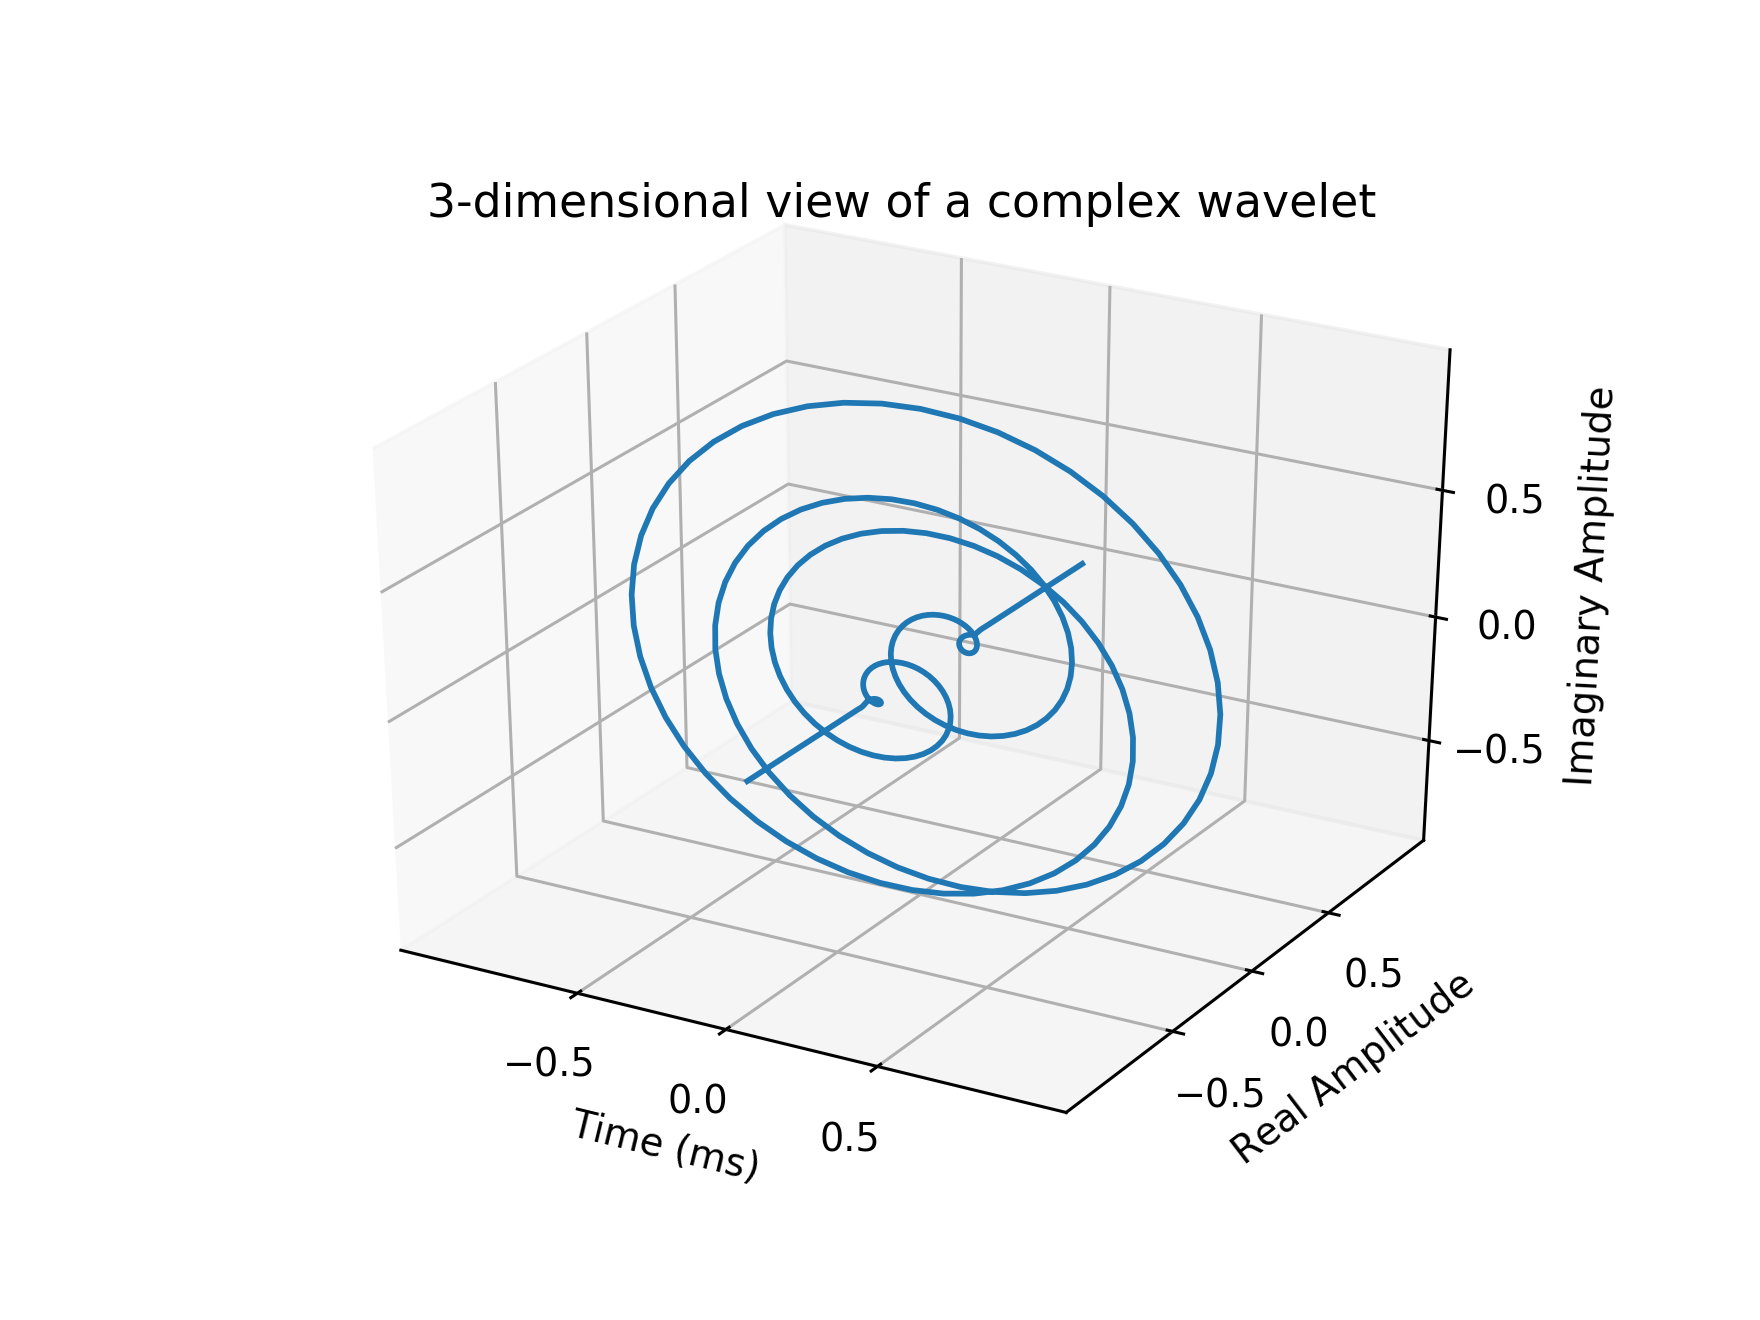

In [3]:
# 3D perspective

ticks = np.linspace(-.5, .5, 3)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(time, np.real(wavelet), np.imag(wavelet), zdir='x')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Real Amplitude')
ax.set_zlabel('Imaginary Amplitude')
ax.set_title('3-dimensional view of a complex wavelet')

plt.show()

### Figure 13.4

**Euler's formula**

Let $M$ be the magnitude of the signal, $\theta$ the angle in radians

$$Me^{i\theta} = M[cos(\theta) + isin(\theta)]$$

<IPython.core.display.Javascript object>


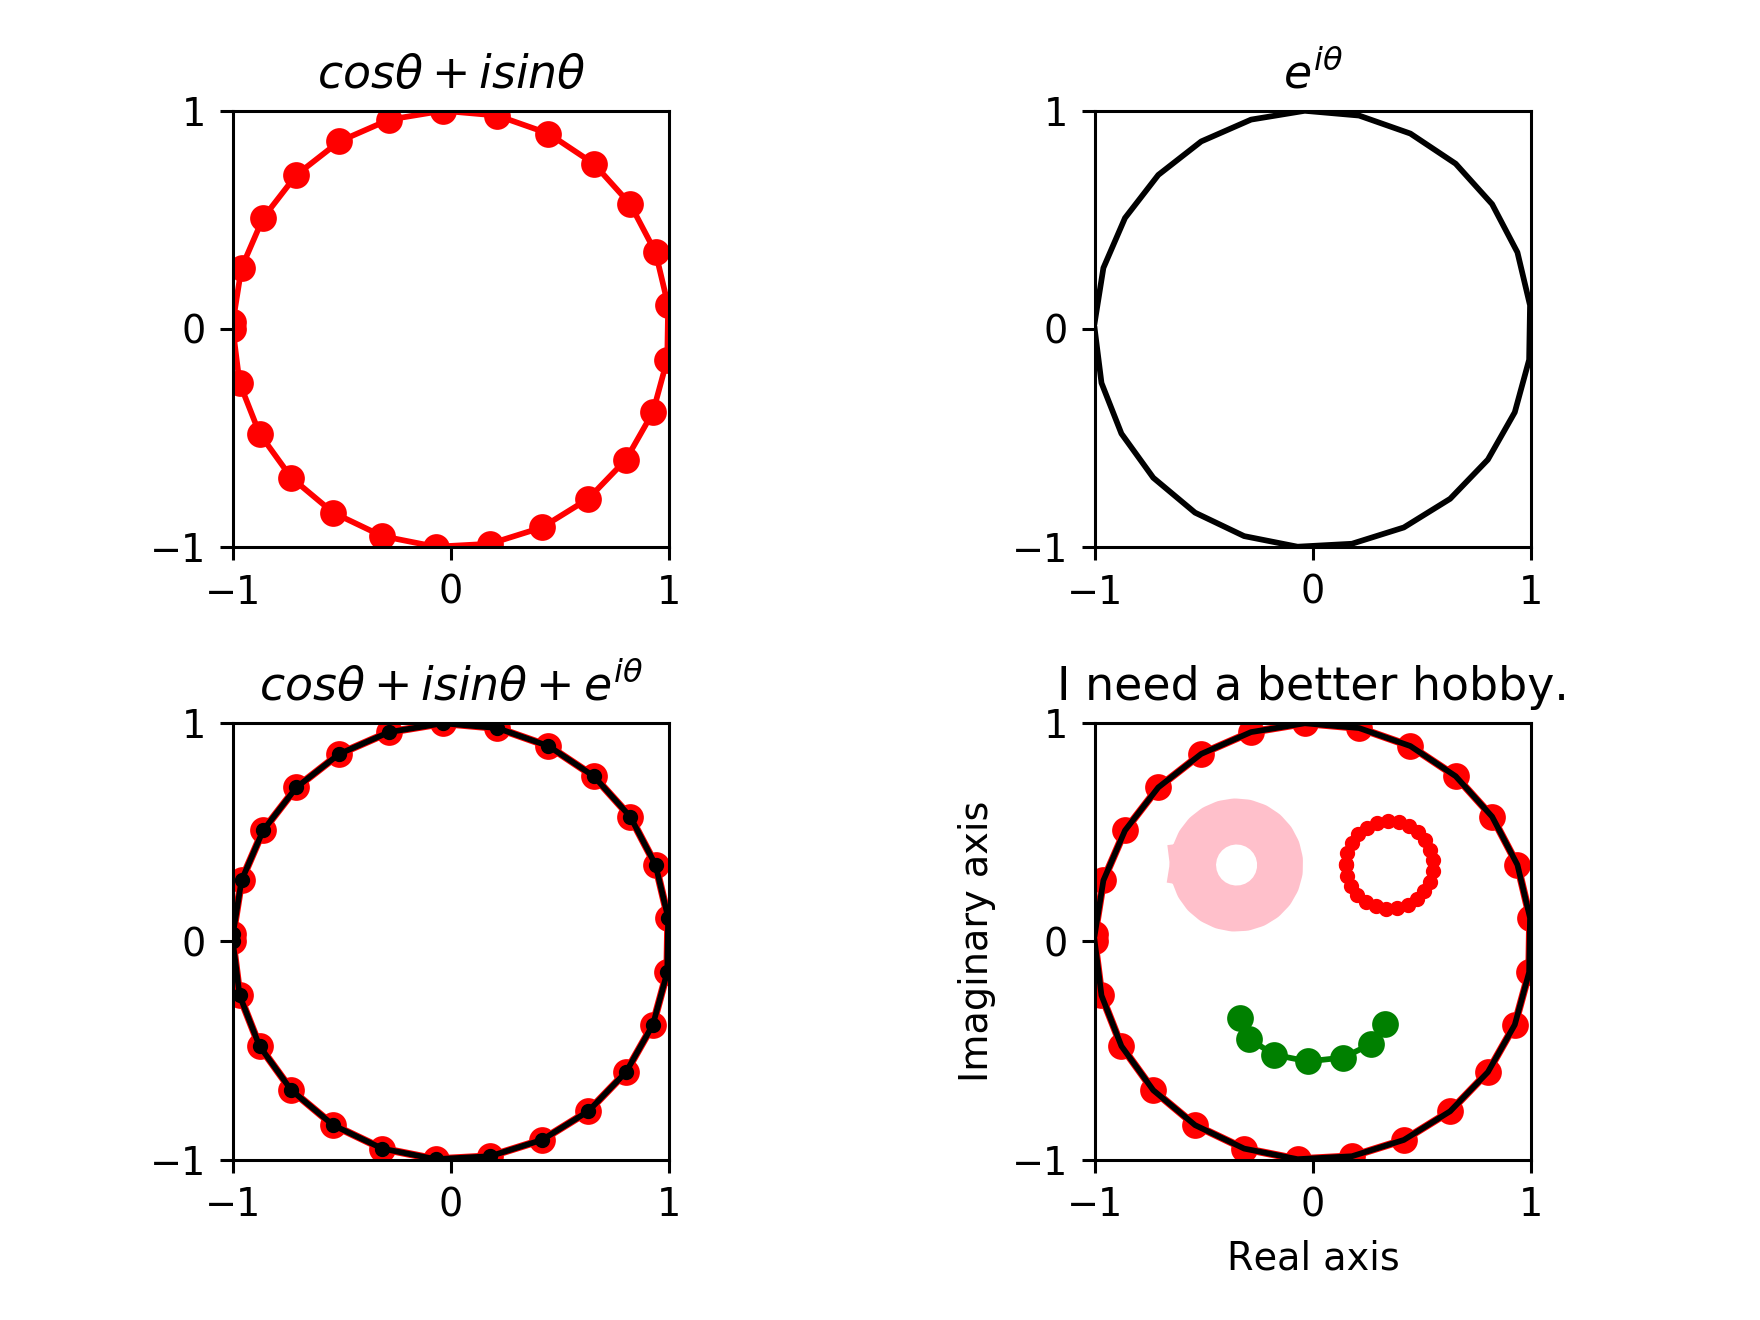

In [4]:
# Euler's formula computes a vector on a unit circle with angle theta

time = np.arange(-np.pi, np.pi, .25)

fig, ax = plt.subplots(nrows=2, ncols=2)

titles = [r'$cos\theta + isin\theta$', r'$e^{i\theta}$', 
          r'$cos\theta + isin\theta + e^{i\theta}$', 'I need a better hobby.']

# The following line is the term contained within the brackets from Euler's formula
ax_00 = np.cos(time) + 1j * np.sin(time)
ax[0, 0].plot(np.real(ax_00), np.imag(ax_00), color='red', marker='o')

# The following line is the term left-multiplied by M on the left side of Euler's formula
ax_01 = np.exp(1j * time)
ax[0, 1].plot(np.real(ax_01), np.imag(ax_01), color='black')

ax[1, 0].plot(np.real(ax_00), np.imag(ax_00), color='red', marker='o', linewidth=2)
ax[1, 0].plot(np.real(ax_01), np.imag(ax_01), color='black', marker='.')

smile = np.arange(-np.pi, 0, .5)
smile_plot = (np.cos(smile) / 3) + 1j * (-.35 + np.sin(smile)/5)
left_eye = (-.35 + np.cos(time) / 5) + 1j * (.35 + np.sin(time)/5)
right_eye = (.35 + np.cos(time) / 5) + 1j * (.35 + np.sin(time)/5)
mouth = (np.cos(smile)/3) + 1j * (-.35 + np.sin(smile)/5)

ax[1, 1].plot(np.real(ax_00), np.imag(ax_00), color='red', marker='o', linewidth=2)
ax[1, 1].plot(np.real(ax_01), np.imag(ax_01), color='black')
ax[1, 1].plot(np.real(left_eye), np.imag(left_eye), color='pink', linewidth=12)
ax[1, 1].plot(np.real(right_eye), np.imag(right_eye), color='red', marker='.')
ax[1, 1].plot(np.real(smile_plot), np.imag(smile_plot), color='green', marker='o')
ax[1, 1].set_xlabel('Real axis')
ax[1, 1].set_ylabel('Imaginary axis')

j = 0
for i in ax.flat:
    i.set_aspect('equal')
    i.set_yticks(np.linspace(-1, 1, 3))
    i.set_xlim([-1, 1]),
    i.set_ylim([-1, 1])
    i.set_title(titles[j])
    j += 1

fig.tight_layout()

### Figure 13.5

<IPython.core.display.Javascript object>


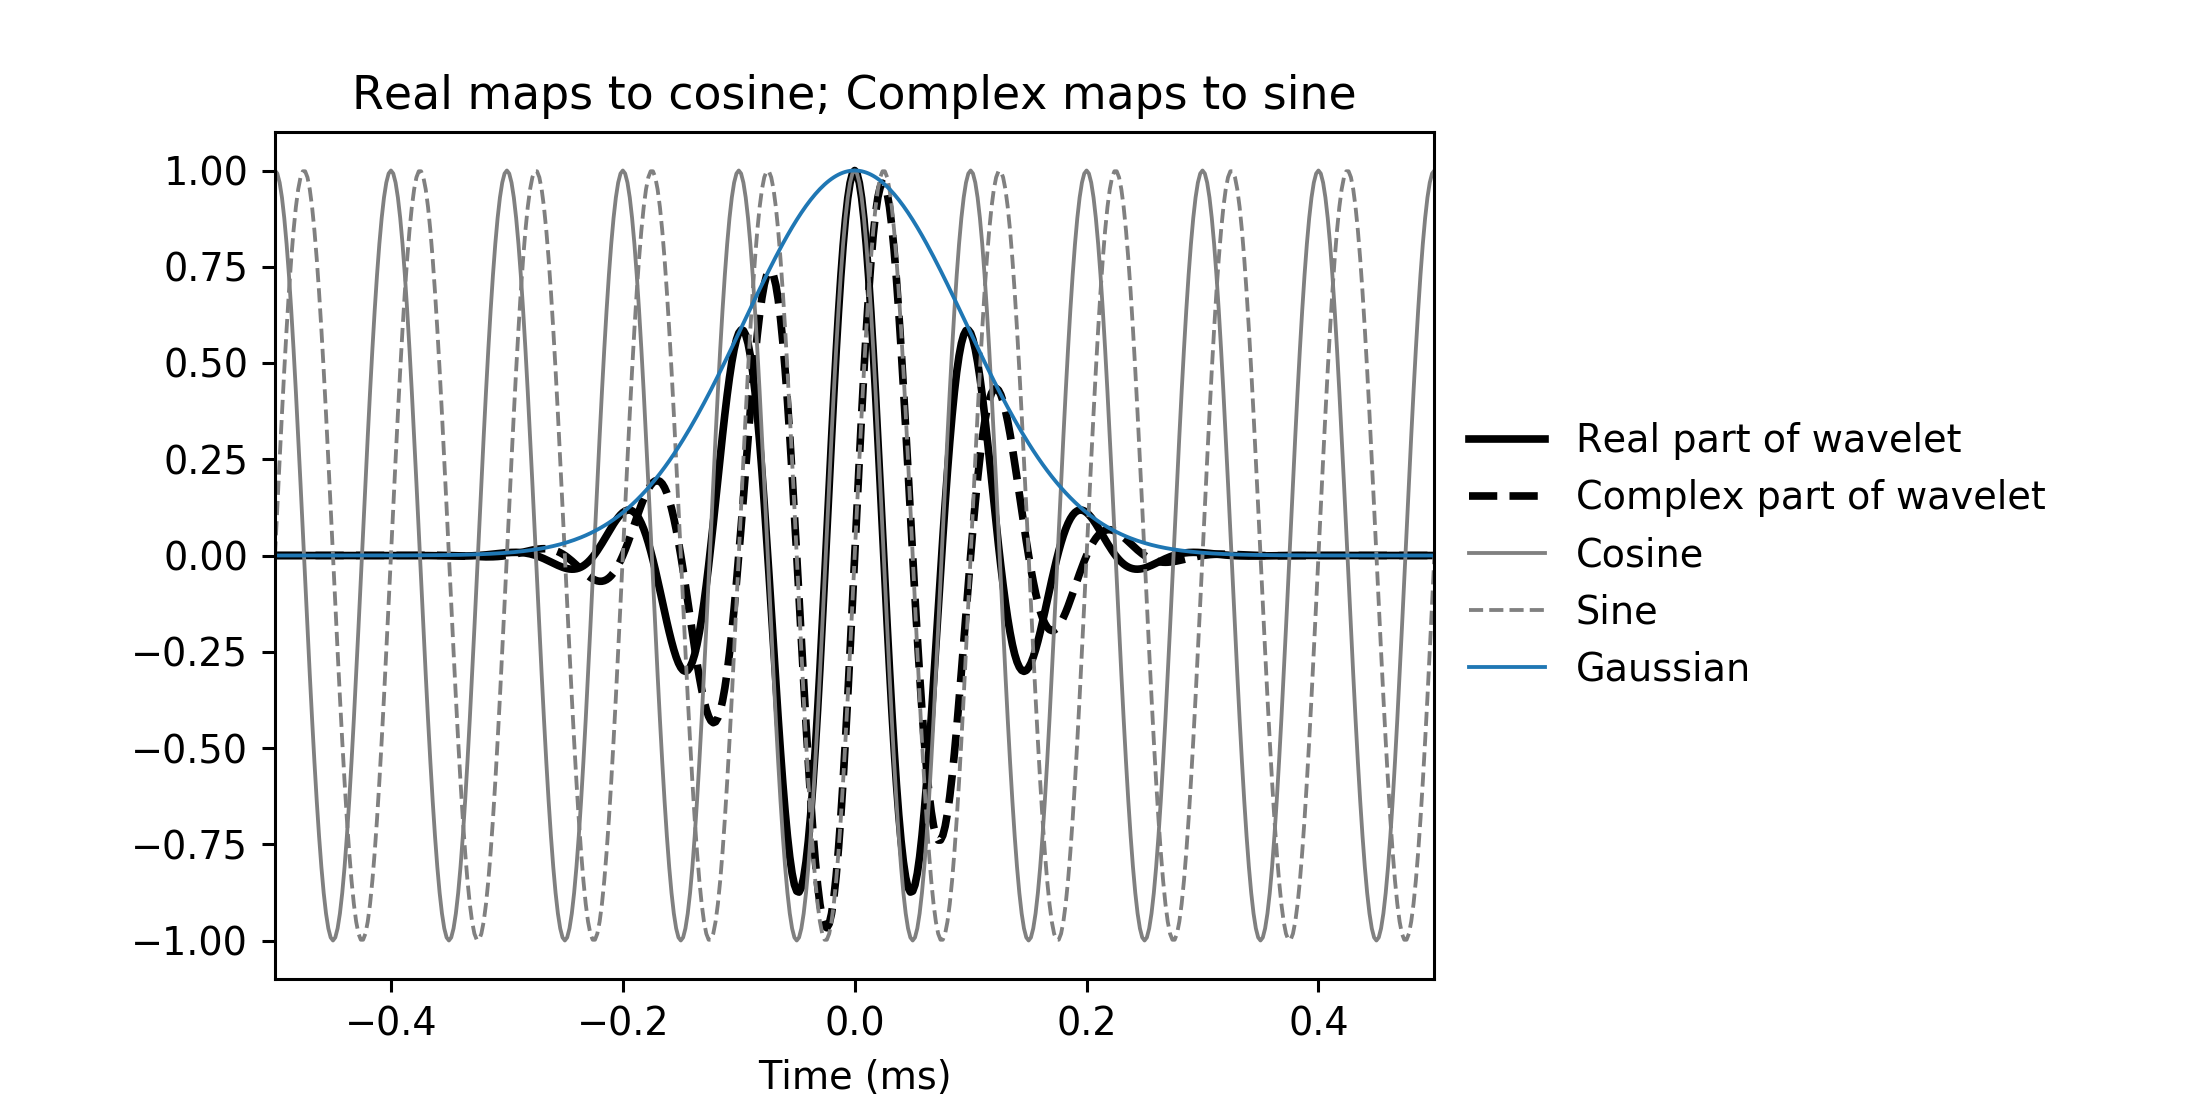

In [5]:
time = time_series(srate, start_time=-.5, end_time=.5)

sine_wave = get_sine_wave(freq, srate, start_time=-.5, end_time=.5, complex_wave=True)
gaussian_window = gauss_win(freq, srate, n_cycles, start_time=-.5, end_time=.5)
wavelet = sine_wave * gaussian_window

# Plot the real and imaginary parts of the wavelet, the cosine and sine, and the gaussian window
# Imaginary part of wavelet maps to sine; real part of wavelet maps to cosine

fig_objects = [np.real(wavelet), np.imag(wavelet), 
               get_sine_wave(freq, srate, start_time=-.5, end_time=.5, cos=True),
               get_sine_wave(freq, srate, start_time=-.5, end_time=.5),
               gaussian_window]
colors = ['black', 'black', 'grey', 'grey', 'C0']
lw = ['2', '2', '1', '1', '1']
ls = ['solid', 'dashed', 'solid', 'dashed', 'solid']
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 1, 1)

for i in range(5):
    ax.plot(time, fig_objects[i], color=colors[i], linewidth=lw[i], linestyle=ls[i])
ax.set_xlabel('Time (ms)')
ax.set_xlim([np.min(time), np.max(time)])
ax.set_title('Real maps to cosine; Complex maps to sine')

# Legend spacing
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.68, box.height])
ax.legend(loc='center left', 
          labels=['Real part of wavelet', 'Complex part of wavelet', 'Cosine', 'Sine', 'Gaussian'],
          bbox_to_anchor=(1, .5),
           frameon=False)
plt.show()

### Figure 13.6

<IPython.core.display.Javascript object>


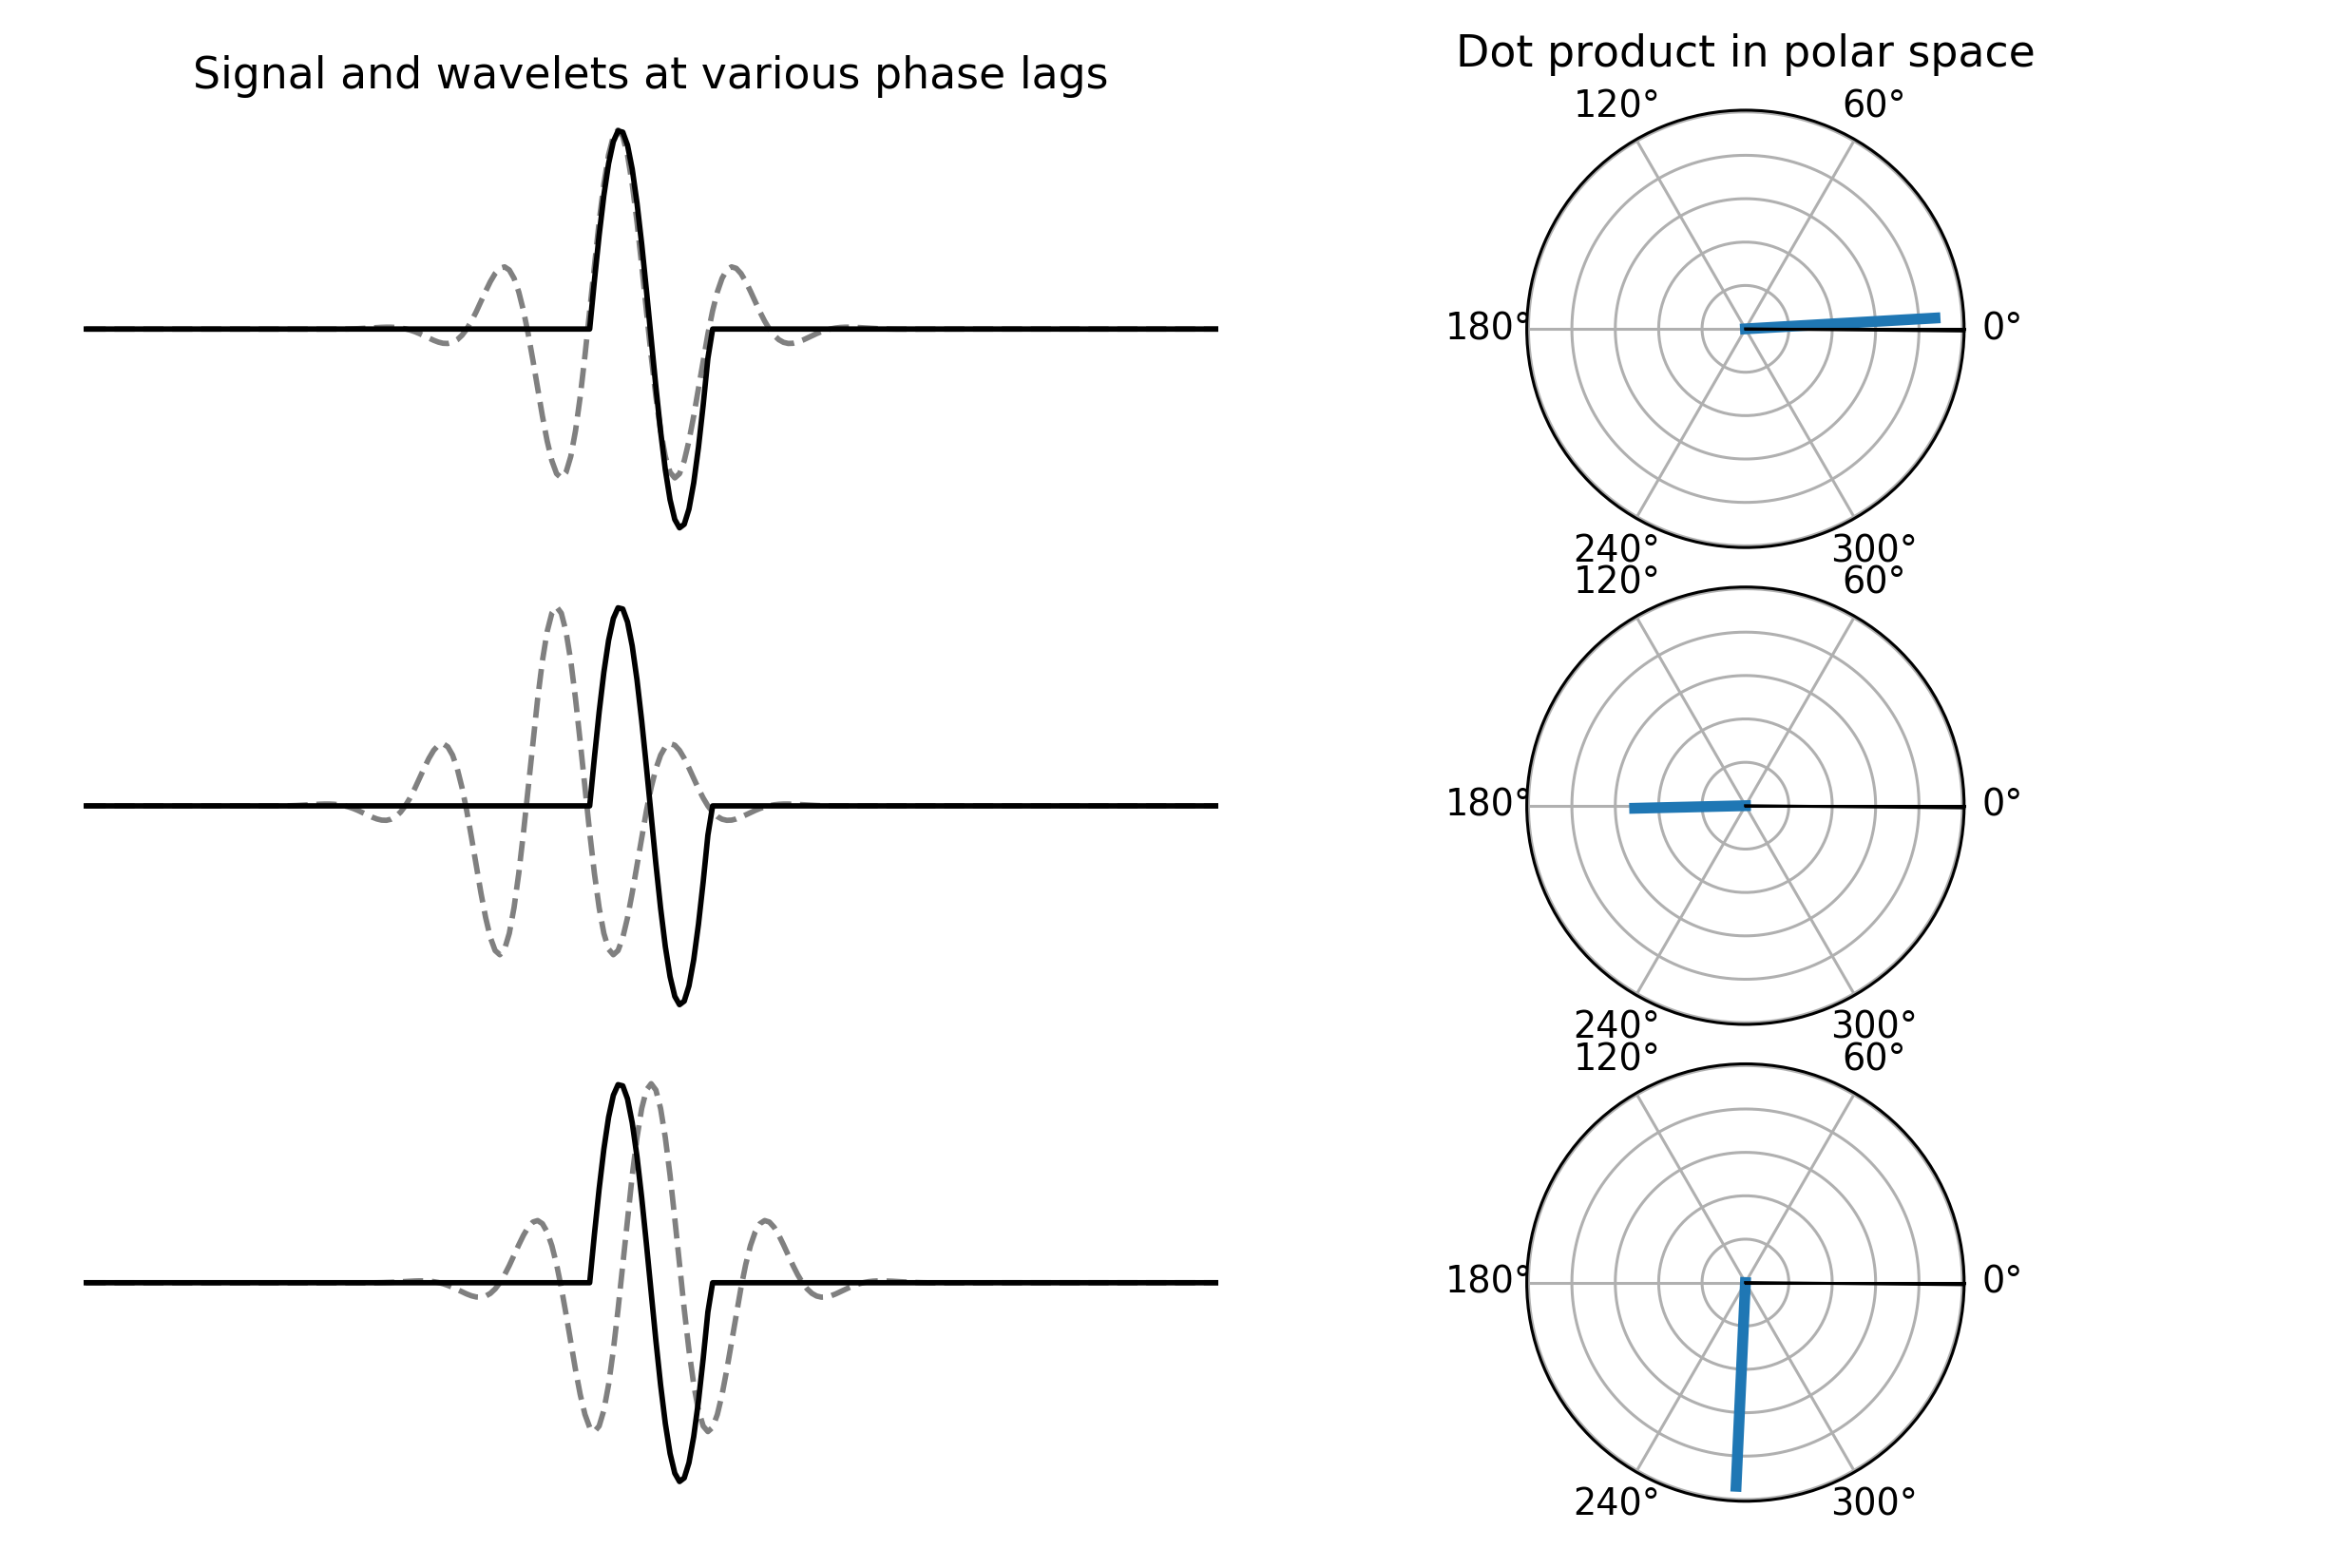

In [6]:
# Define start and end of time series
st = -len(eeg_time) / samp_rate / 2
et = len(eeg_time) / samp_rate / 2 - 1 / samp_rate

# 10 Hz kernel wavelet
time = time_series(samp_rate, start_time=st, end_time=et)
freq = 10
n_cycles = 4
wavelet = get_sine_wave(freq, samp_rate, 
                        start_time=st, end_time=et, complex_wave=True) * gauss_win(freq, samp_rate, n_cycles, 
                        start_time=st, end_time=et)

# Define the signal as one sine cycle
signal_no_zp = np.delete(get_sine_wave(freq, samp_rate, start_time=0, end_time=1 / freq), -1)

# Zero-pad the signal to be same length as kernel wavelet
zero_pad = np.zeros(round(len(time) / 2 - len(signal_no_zp) / 2))
signal = np.concatenate((zero_pad, signal_no_zp, zero_pad), axis=None)

# Phase lag the wavelets
wave_1 = wavelet[round(100 / freq)-3:]
wave_2 = wavelet[round(2.3 * (100 / freq) - 3):]
wave_3 = wavelet
iter_waves = [wave_1, wave_2, wave_3]

# Compute dot products at selected phase lags
dot_prod1 = np.dot(wave_1, signal[:-round(100 / freq) + 3])
dot_prod2 = np.dot(wave_2, signal[:-round(2.3 * (100 / freq) - 3)])
dot_prod3 = np.dot(wave_3, signal)
iter_dot = [dot_prod1, dot_prod2, dot_prod3]

# Set the figure and grid
fig = plt.figure(figsize=(9, 6))
full_grid = fig.add_gridspec(3, 2)

# Set the subgrids
grid_A = full_grid[:, 0].subgridspec(3, 1)
grid_B = full_grid[:, 1].subgridspec(3, 1)

# Plot waveforms
for i in range(len(iter_waves)):
    ax_A = fig.add_subplot(grid_A[i, 0])
    ax_A.plot(np.real(iter_waves[i]), color='grey', linestyle='dashed')
    ax_A.plot(signal, color='black')
    ax_A.set_xlim([200, len(time) - 200])
    ax_A.set_xticklabels([])
    ax_A.set_yticklabels([])
    ax_A.axis('off')
    if i == 0:
        ax_A.set_title('Signal and wavelets at various phase lags')

# Plot dot products in polar space
for i in range(len(iter_dot)):
    ax_B = fig.add_subplot(grid_B[i, 0], projection='polar')
    ax_B.plot([0, 12], alpha=0)
    ax_B.plot([np.angle(iter_dot[i]), np.angle(iter_dot[i])], [0, np.abs(iter_dot[i])], color='C0', linewidth=3)
    ax_B.set_xticks(np.linspace(0, np.pi*2, 7))
    ax_B.set_yticklabels([])
    ax_B.set_thetalim([0, np.pi * 2 - .01])
    ax_B.tick_params(pad=0)
    if i == 0:
        ax_B.set_title('Dot product in polar space')
fig.tight_layout()

### Figure 13.8

<IPython.core.display.Javascript object>


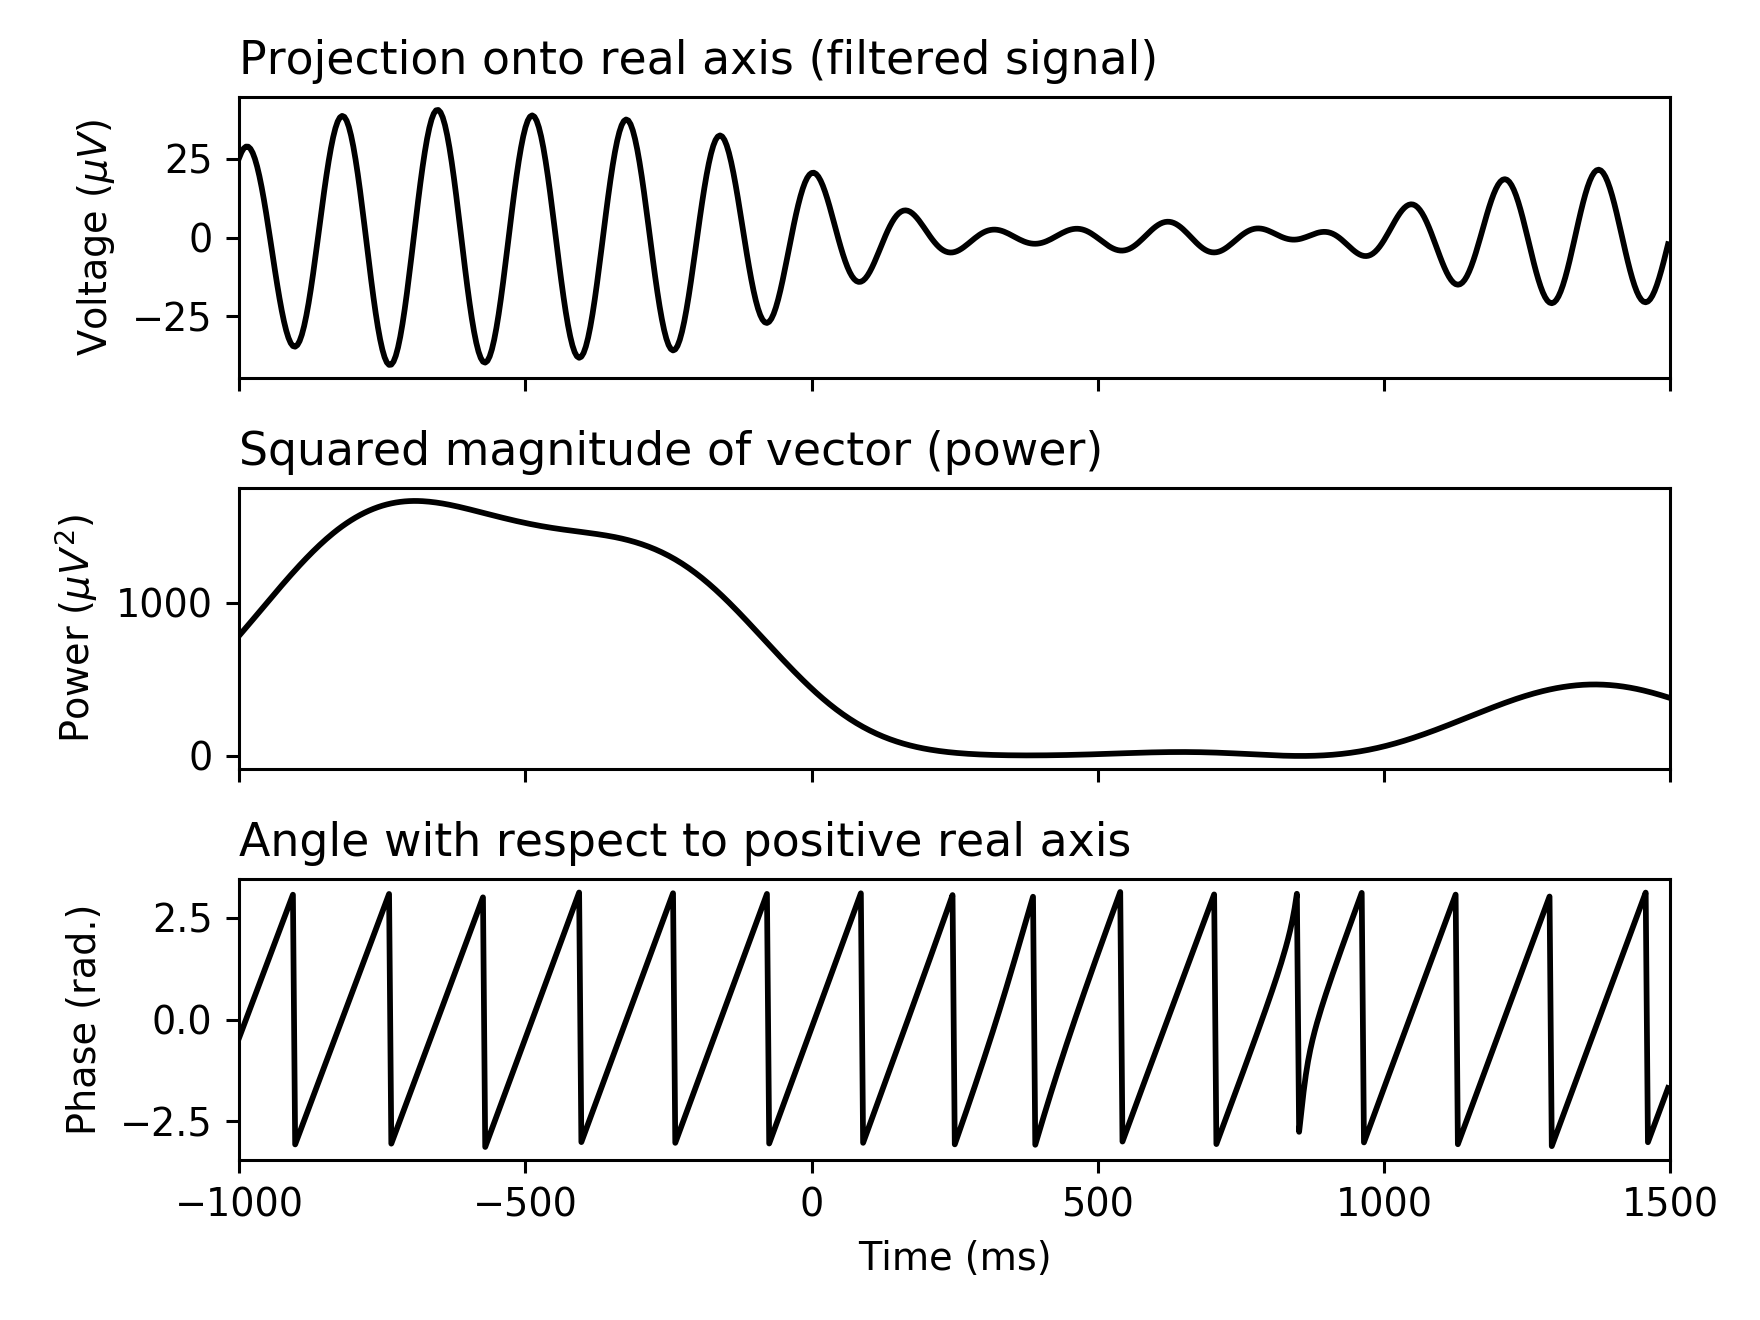

In [7]:
plt.rc('font', size=10)
freq = 6
time = time_series(samp_rate)
n_cycles = 4
wavelet = get_sine_wave(freq, samp_rate, complex_wave = True) * gauss_win(freq, samp_rate, n_cycles, normalize = True)

# Specify FFT parameters
n_wavelet = len(wavelet)
n_data = len(eeg_time)
n_conv = n_wavelet + n_data - 1
half_of_wavelet = (n_wavelet - 1) // 2

# Need to  compute the standard deviation term from the gaussian window function 
sd = (n_cycles / (2 * np.pi * freq));

# Run FFT
fft_wavelet = np.fft.fft(wavelet, n_conv)
fft_data = np.fft.fft(np.squeeze(eeg_data[46, :, 0]), n_conv)# Electrode FCz, 1st trial

# Compute and slice the convolution result
temp_conv_res_fft = np.fft.ifft(fft_wavelet * fft_data, n_conv) * sd
conv_res_fft = temp_conv_res_fft[half_of_wavelet:len(temp_conv_res_fft) - half_of_wavelet]

# Plot for comparison ----------
# Note that this data is identical to Cohen's MATLAB code, although the data from the text is 
# slightly different. Maybe a different channel was plotted for the textbook? The main 
# takeaways from the figure are relevant here.
# ------------------------------

axs_data = [np.real(conv_res_fft), np.abs(conv_res_fft) ** 2, np.angle(conv_res_fft)]
titles = ['Projection onto real axis (filtered signal)', 
          'Squared magnitude of vector (power)', 
          'Angle with respect to positive real axis']
y_labs = [r'Voltage ($\mu V$)', r'Power ($\mu V^2$)', 'Phase (rad.)']

fig, axs = plt.subplots(nrows=3, sharex=True)

j = 0
for ax in axs:
    ax.plot(eeg_time, axs_data[j], color='black')
    ax.set_ylabel(y_labs[j])
    ax.set_title(titles[j], loc='left')
    j += 1
axs[2].set_xlim([-1000, 1500])
axs[2].set_xlabel('Time (ms)')
fig.tight_layout()

### Figure 13.9

<IPython.core.display.Javascript object>


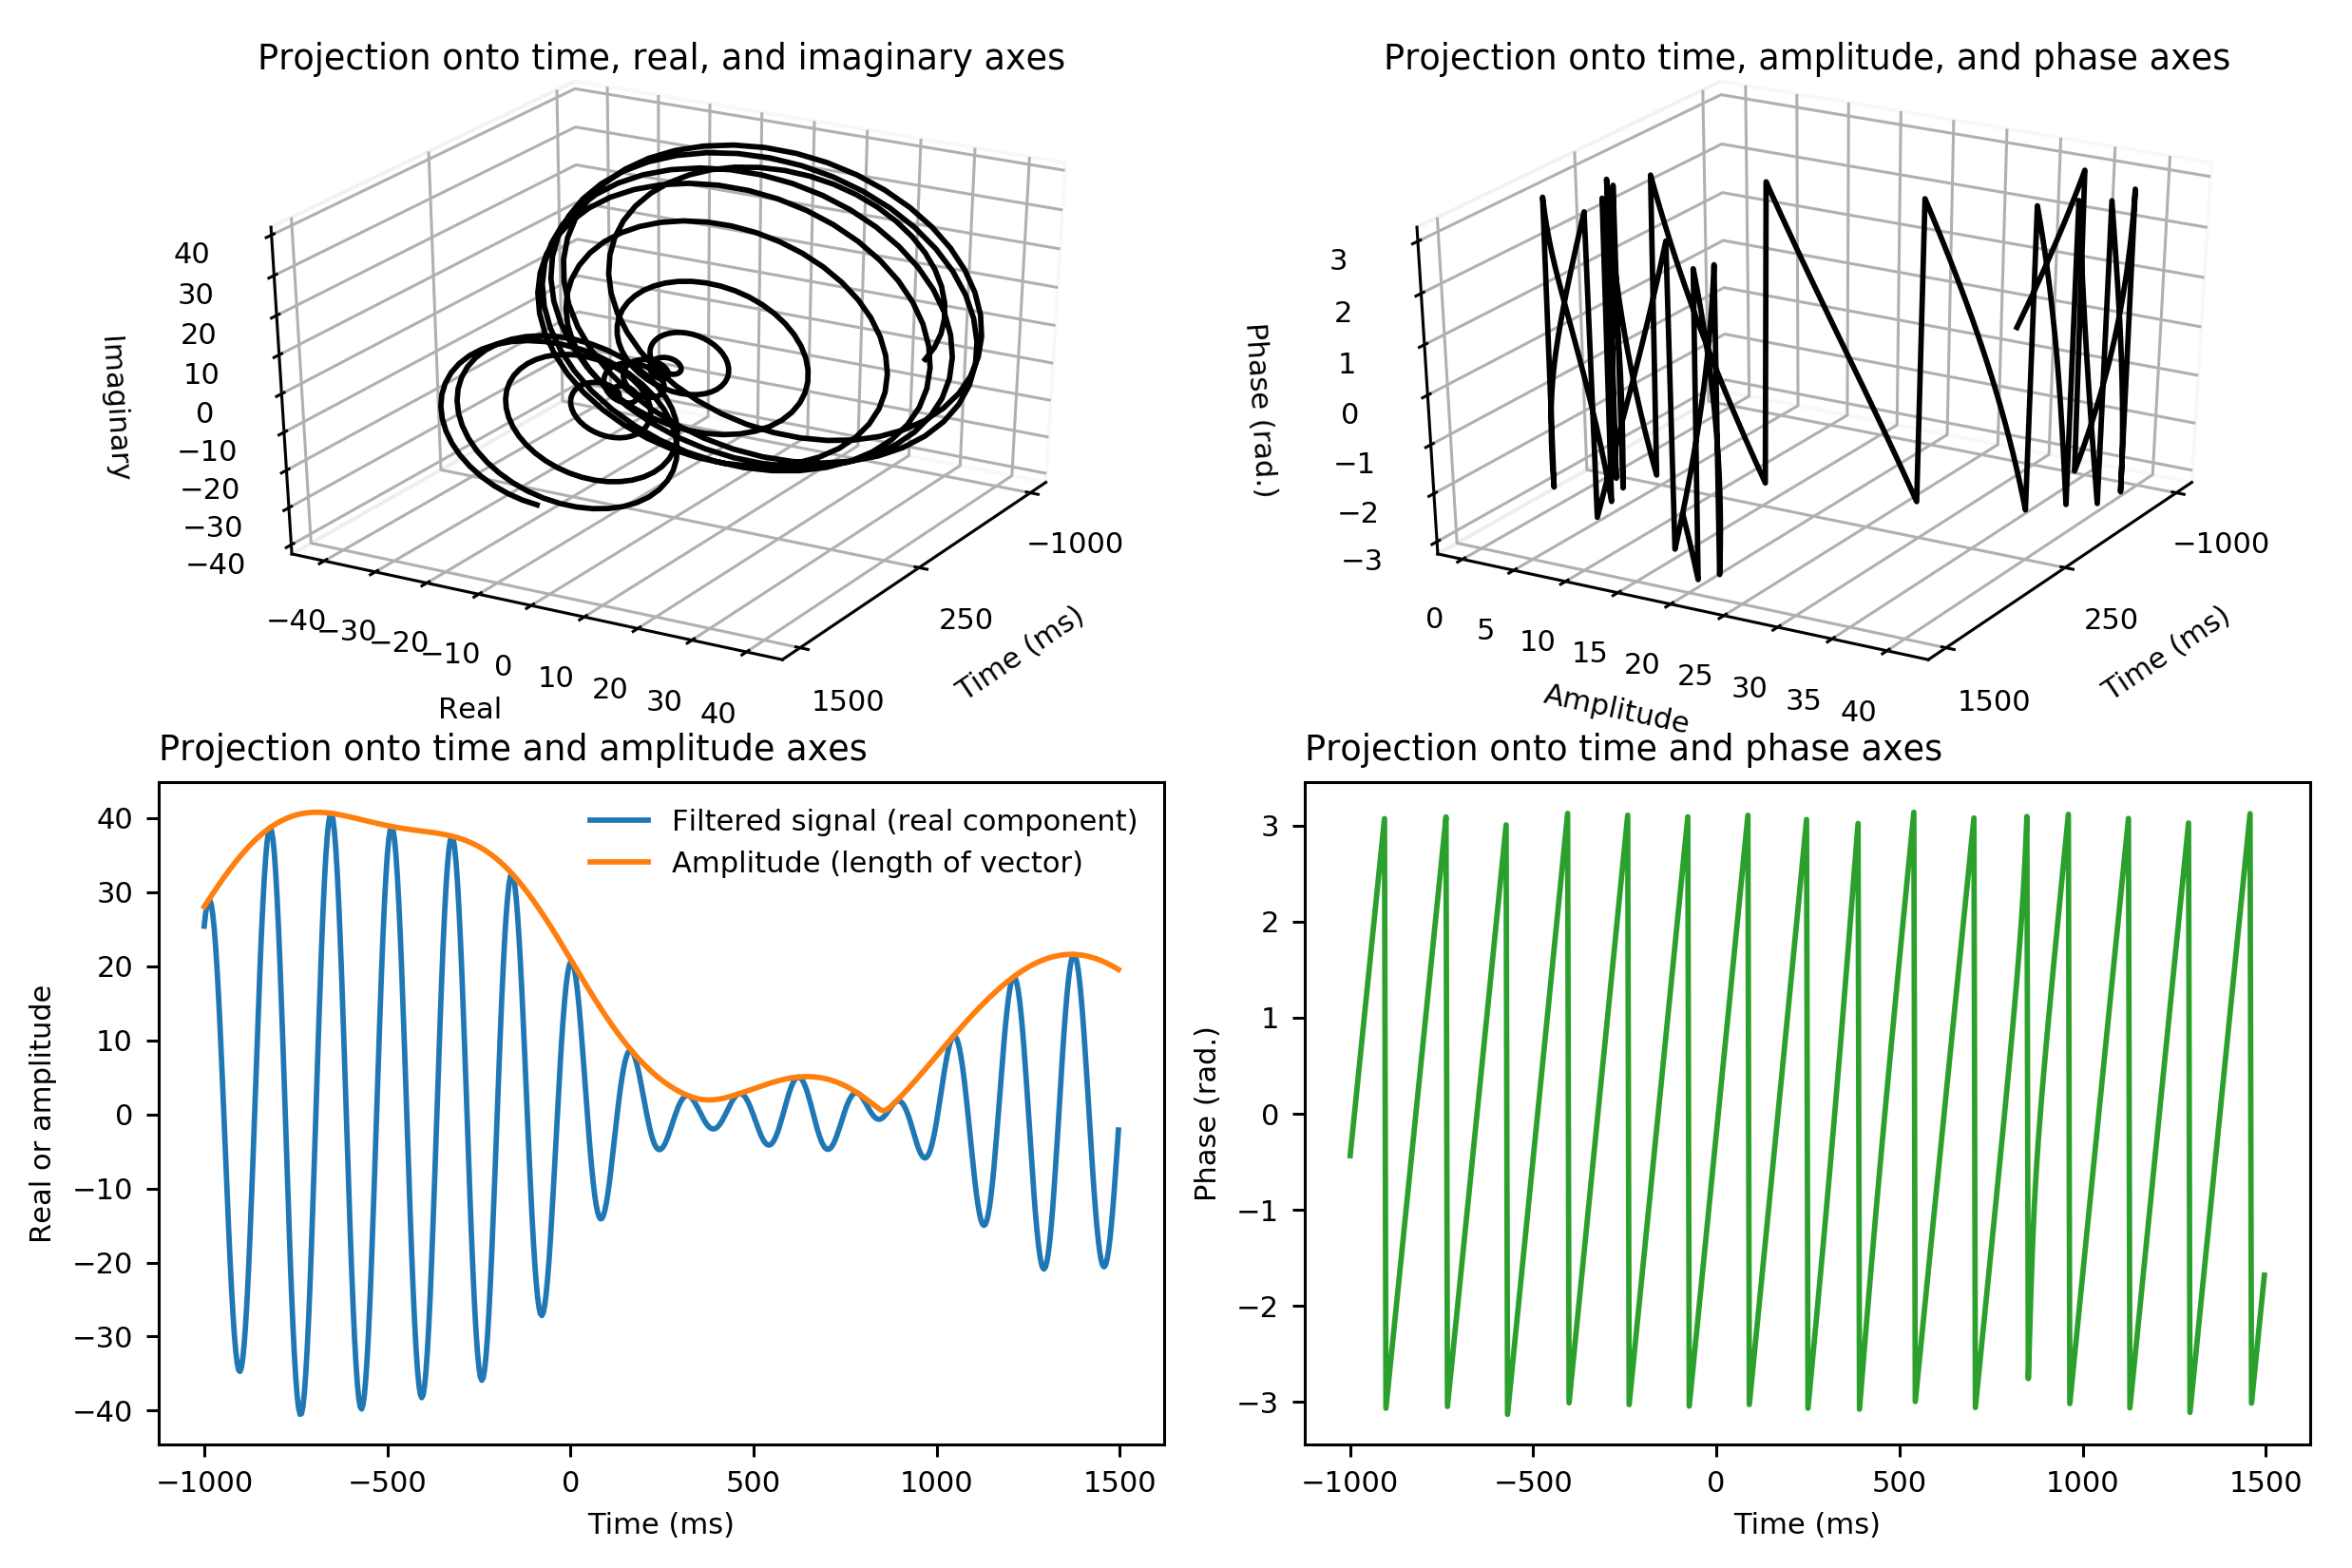

In [8]:
# Same data as Figure 13.8 ----------
# Note that this data is identical to Cohen's MATLAB code, although the data from the text is 
# slightly different. Maybe a different channel was plotted for the textbook? The main 
# takeaways from the figure are relevant here.
# -----------------------------------
plt.rc('font', size=8)

fig = plt.figure(figsize=(9, 6))

ax_0 = plt.subplot(2, 2, 1, projection='3d')
ax_0.plot3D(eeg_time, np.real(conv_res_fft), np.imag(conv_res_fft), color='black')
ax_0.set_xticks(np.linspace(-1000, 1500, 3))
ax_0.set_xlabel('Time (ms)')
ax_0.set_ylabel('Real')
ax_0.set_zlabel('Imaginary')
ax_0.set_title('Projection onto time, real, and imaginary axes')
ax_0.xaxis.pane.fill = False
ax_0.yaxis.pane.fill = False
ax_0.zaxis.pane.fill = False
ax_0.view_init(azim=30)

ax_1 = plt.subplot(2, 2, 2, projection='3d')
ax_1.plot3D(eeg_time, np.abs(conv_res_fft), np.angle(conv_res_fft), color='black')
ax_1.set_xticks(np.linspace(-1000, 1500, 3))
ax_1.set_xlabel('Time (ms)')
ax_1.set_ylabel('Amplitude')
ax_1.set_zlabel('Phase (rad.)')
ax_1.set_title('Projection onto time, amplitude, and phase axes')
ax_1.xaxis.pane.fill = False
ax_1.yaxis.pane.fill = False
ax_1.zaxis.pane.fill = False
ax_1.view_init(azim=30)

ax_2 = plt.subplot(2, 2, 3)
ax_2.plot(eeg_time, np.real(conv_res_fft))
ax_2.plot(eeg_time, np.abs(conv_res_fft))
ax_2.set_xlabel('Time (ms)')
ax_2.set_ylabel('Real or amplitude')
ax_2.set_title('Projection onto time and amplitude axes', loc='left')
ax_2.legend(labels = ['Filtered signal (real component)', 'Amplitude (length of vector)'], 
            loc='upper right', frameon=False)

ax_3 = plt.subplot(2, 2, 4)
ax_3.plot(eeg_time, np.angle(conv_res_fft), color='C2')
ax_3.set_xlabel('Time (ms)')
ax_3.set_ylabel('Phase (rad.)')
ax_3.set_title('Projection onto time and phase axes', loc='left')

fig.tight_layout()

### Figure 13.10

<IPython.core.display.Javascript object>


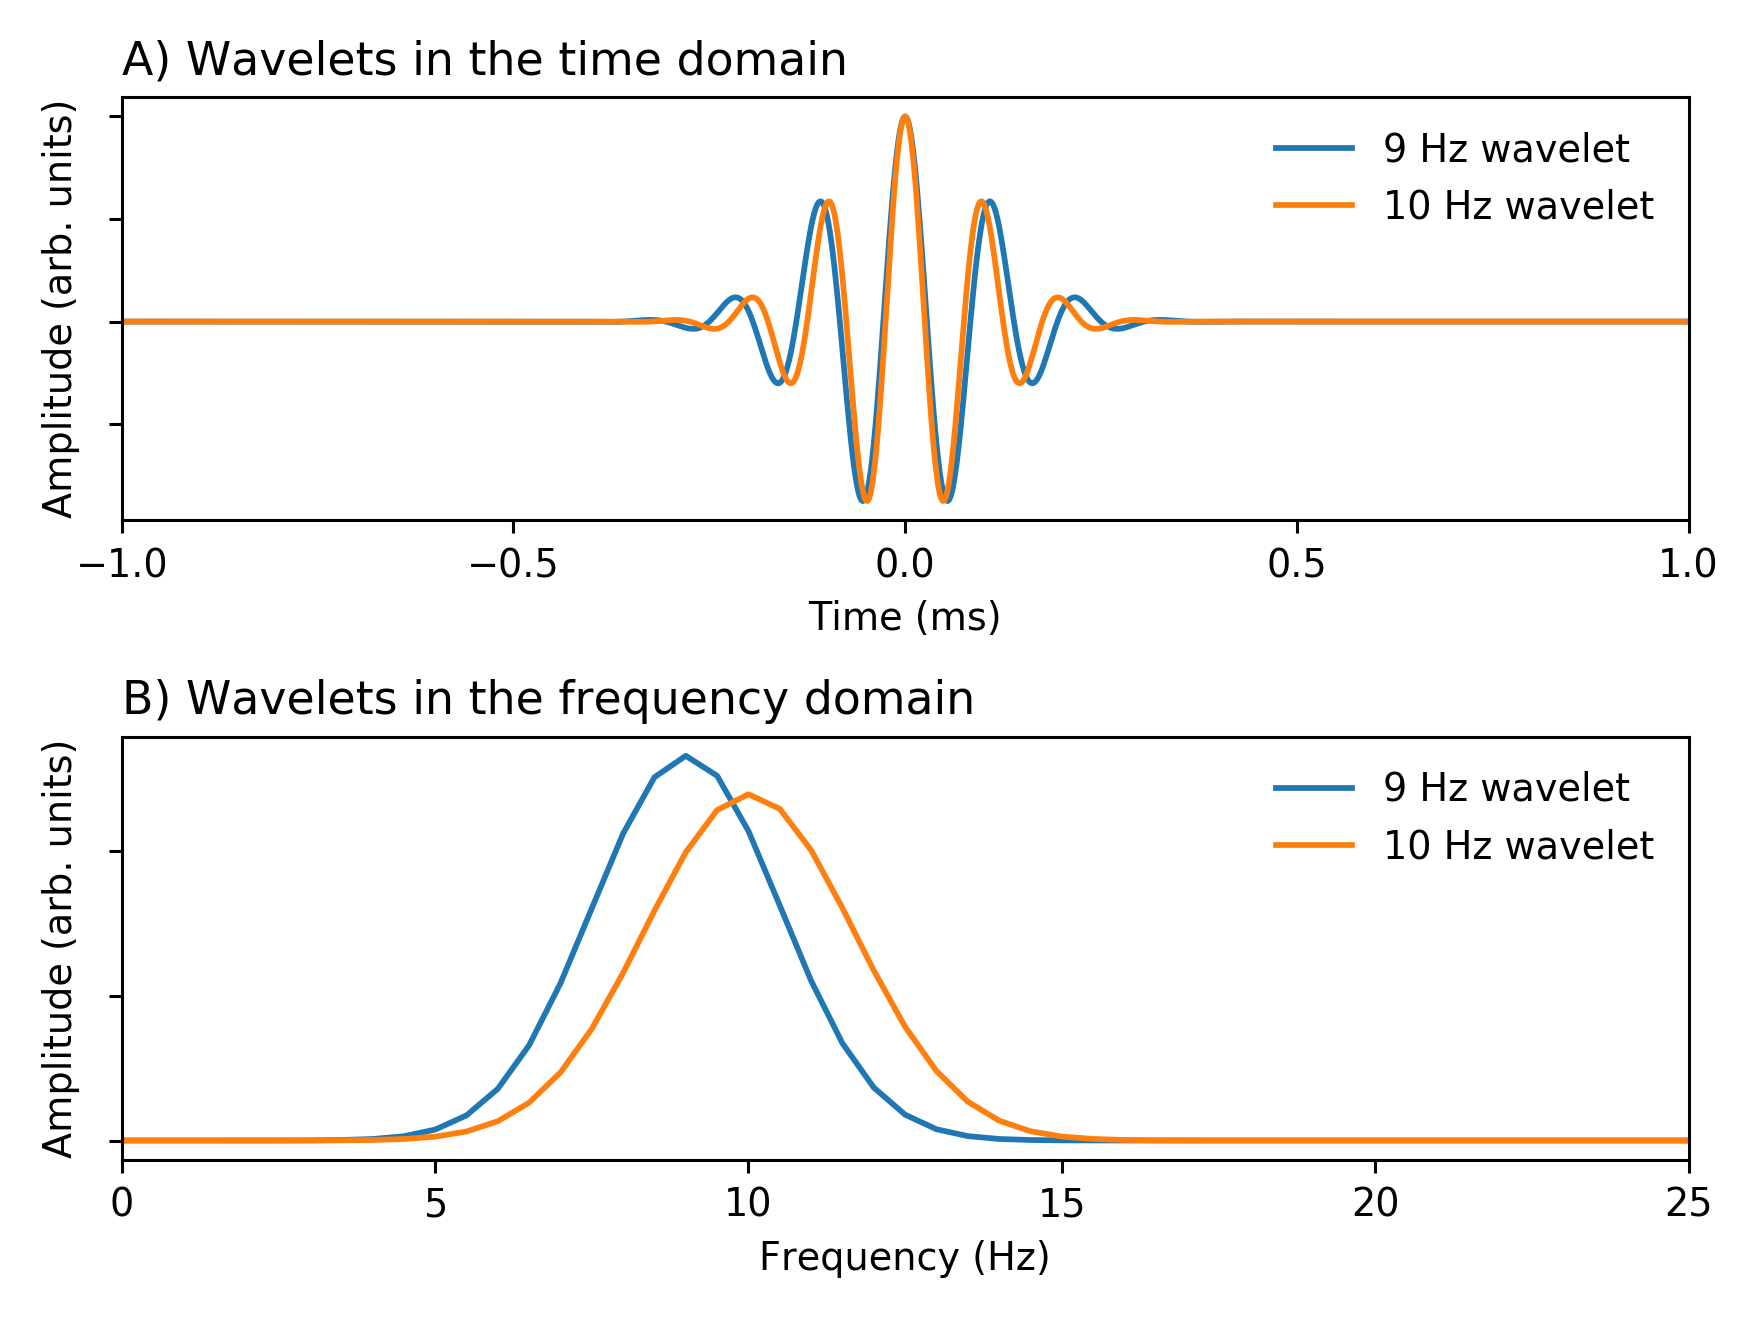

In [9]:
plt.rc('font', size=10)

srate = 500
time = time_series(srate)
n_cycles = 6

# 9 Hz wavelet
freq = 9
wavelet_9 = get_sine_wave(freq, srate, complex_wave=True) * gauss_win(freq, srate, n_cycles)

# 10 Hz wavelet
freq = 10
wavelet_10 = get_sine_wave(freq, srate, complex_wave=True) * gauss_win(freq, srate, n_cycles)

# Compute FFT
hz = np.linspace(0, srate / 2, int(np.floor(len(time) / 2) + 1))
fft_9 = np.fft.fft(wavelet_9)
fft_10 = np.fft.fft(wavelet_10)

fig, ax = plt.subplots(nrows=2)

ax[0].plot(time, np.real(wavelet_9)),
ax[0].plot(time, np.real(wavelet_10))
ax[0].set_xticks(np.linspace(-1, 1, 5))
ax[0].set_xlim([-1, 1])
ax[0].set_xlabel('Time (ms)')
ax[0].set_title('A) Wavelets in the time domain', loc='left')

ax[1].plot(hz, np.abs(fft_9[:len(hz)]))
ax[1].plot(hz, np.abs(fft_10[:len(hz)]))
ax[1].set_xlim([0, 25])
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_title('B) Wavelets in the frequency domain', loc='left')

for i in ax:
    i.set_yticklabels([])
    i.set_ylabel('Amplitude (arb. units)')
    i.legend(labels=['9 Hz wavelet', '10 Hz wavelet'], frameon=False)

fig.tight_layout()

### Figure 13.11

<IPython.core.display.Javascript object>


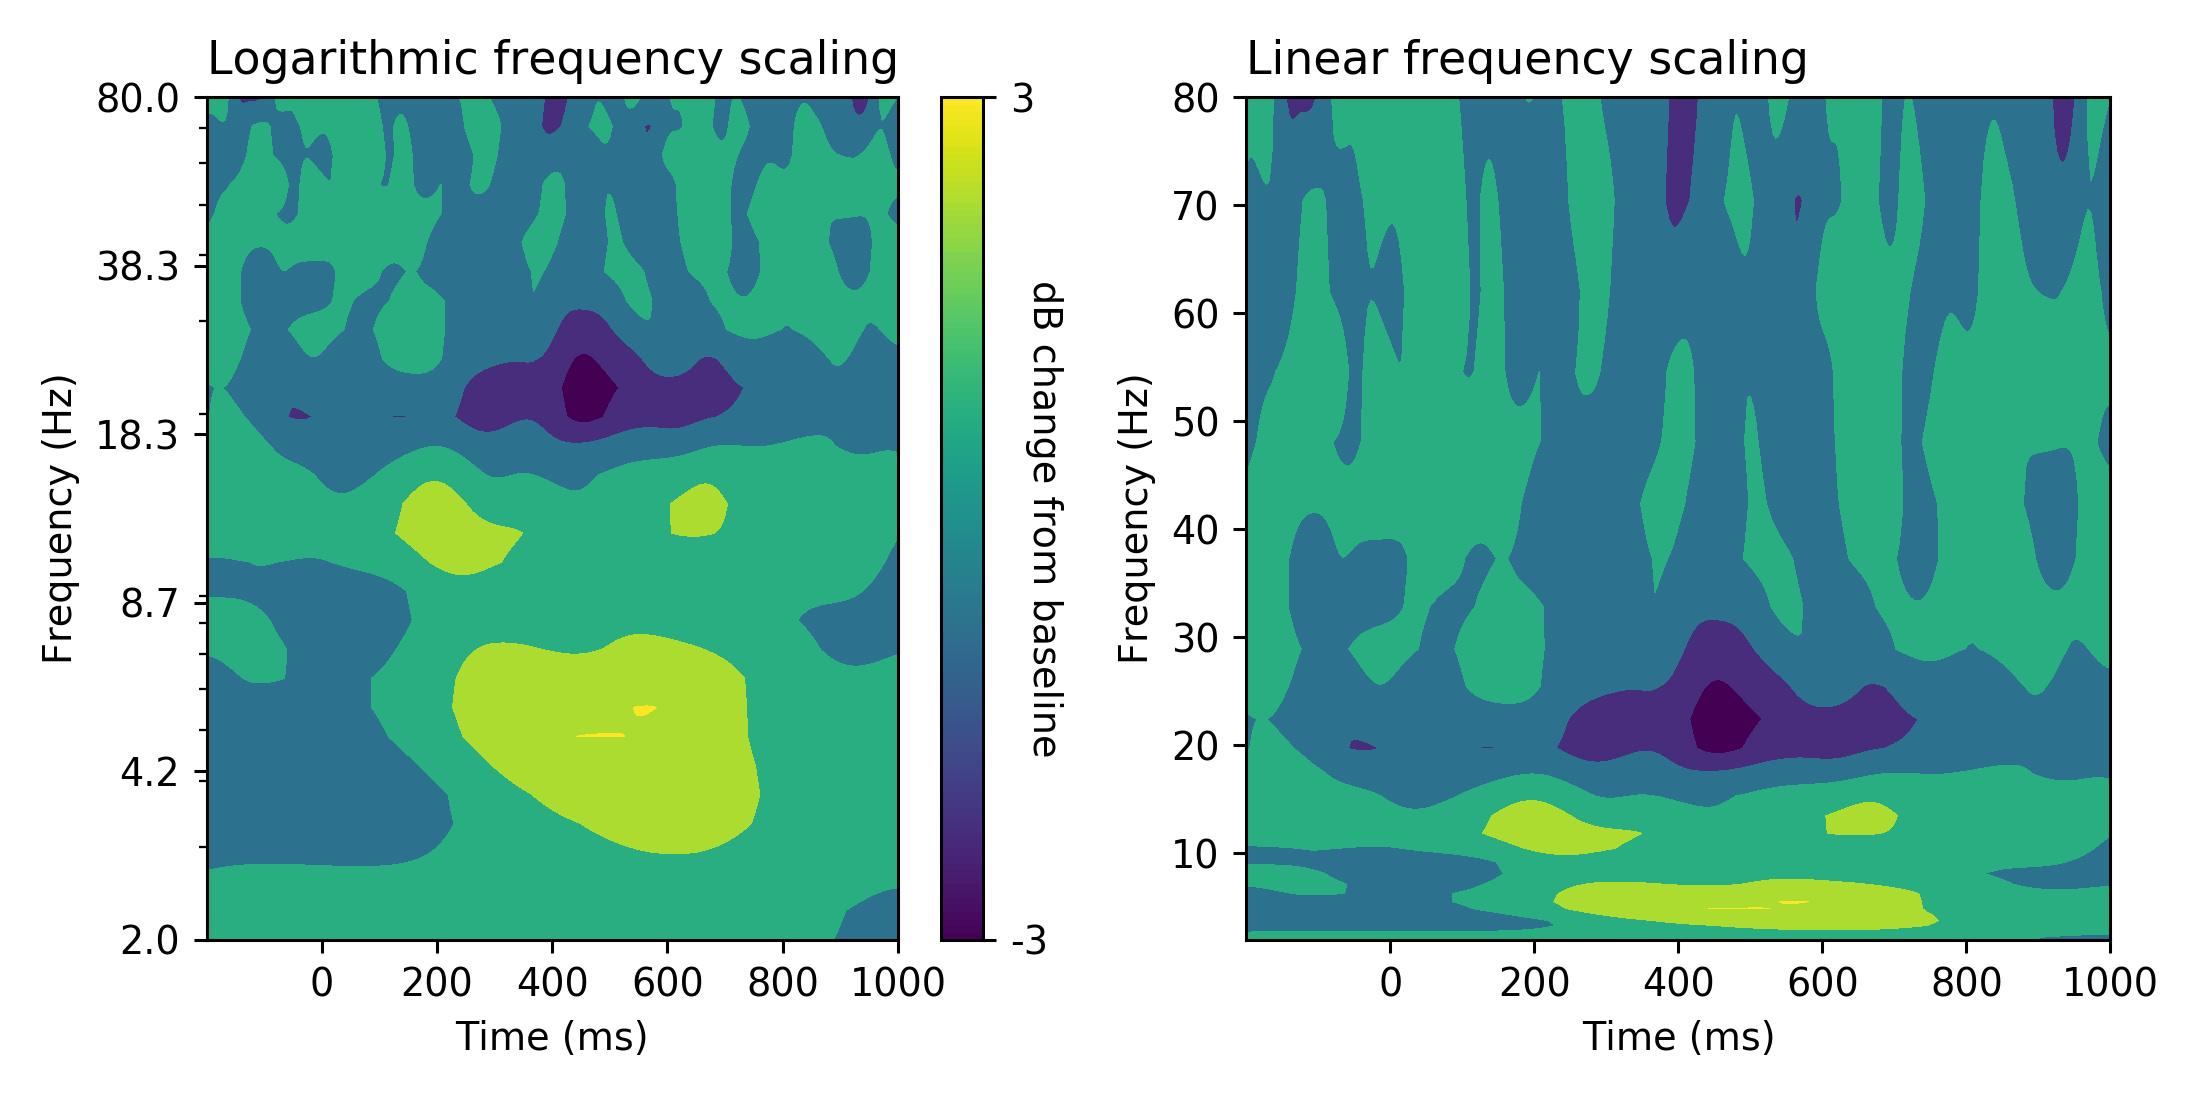

In [10]:
# Specify parameters
min_freq = 2
max_freq = 80
n_freqs = 30
time = time_series(samp_rate)
freqs = np.logspace(np.log10(min_freq), np.log10(max_freq), n_freqs)
n_cycles = np.logspace(np.log10(3), np.log10(10), n_freqs)
s = n_cycles / (2 * np.pi * freqs)

# Specify FFT parameters
n_data = len(eeg_time) * np.shape(eeg_data)[2]
n_conv = n_wavelet + n_data - 1

# This replicates Matlabs pow2(nextpow2(x)) method
# nextpow2(x) -> ceil(log2(abs(x)))
# pow2(x) -> pow(pow(x, 2), 2)
n_conv_pow2 = pow(pow(ceil(np.log2(abs(n_conv))), 2), 2)

# Compute FFT on EEG data at channel FCz
eeg_fft = np.fft.fft(eeg_data[46, :, :].reshape(n_data, order='F'), n_conv_pow2)

# Initialize power array
eeg_power = np.zeros([n_freqs, len(eeg_time)])

# Find the nearest neighbors of -500 and -200 in eeg_time
base_idx = find_nearest(eeg_time, [-500, -200])

# Iterate though frequencies and compute synchronization
for i in range(n_freqs):
    
    # Generate the wavelet
    wavelet = np.fft.fft(
        np.sqrt(1 / (s[i] * np.sqrt(np.pi))) * get_sine_wave(
            freqs[i], samp_rate, complex_wave=True) * gauss_win(
                freqs[i], samp_rate, n_cycles[i]), n_conv_pow2)
    
    # Perform the convolution
    temp_eeg_conv = np.fft.ifft(wavelet * eeg_fft)
    temp_eeg_conv = temp_eeg_conv[:n_conv]
    eeg_conv = temp_eeg_conv[half_of_wavelet:len(temp_eeg_conv) - half_of_wavelet]
    
    # Average power over trials with baseline transform
    temp_power = np.mean(
        np.abs(eeg_conv.reshape(np.shape(eeg_data)[1], np.shape(eeg_data)[2], order='F')) ** 2,
        1
    )
    eeg_power[i, :] = 10 * np.log10(temp_power / np.mean(temp_power[base_idx[0]:base_idx[1]]))

# Plot the results
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

# Remove minor ticks from log scale y axis
rcParams['ytick.minor.size'] = 0
rcParams['xtick.minor.width'] = 0

j = 0
for i in ax:
    image = i.contourf(eeg_time, freqs, eeg_power, vmin=-3, vmax=3)
    m = plt.cm.ScalarMappable()
    m.set_array(eeg_power)
    m.set_clim(-3, 3)
    i.set_xlim([-200, 1000])
    i.set_xticks(np.linspace(0, 1000, 6))
    i.set_xlabel('Time (ms)')
    i.set_ylabel('Frequency (Hz)')
    if j == 0:
        cbar = fig.colorbar(m, ax=ax[0], boundaries=np.arange(-3, 3.05, .05))
        cbar.set_ticks([-3, 3])
        cbar.set_ticklabels([-3, 3])
        cbar.set_label('dB change from baseline', rotation=270)
        ticks = np.logspace(np.log10(min_freq), np.log10(max_freq), 6)
        i.set_yscale('log')
        i.set_yticks(ticks)
        i.set_yticklabels(np.round(ticks * 10) / 10)
        i.set_title('Logarithmic frequency scaling', loc='left')
    else:
        i.set_title('Linear frequency scaling', loc='left')
    j += 1

fig.tight_layout()

### Figure 13.12

<IPython.core.display.Javascript object>


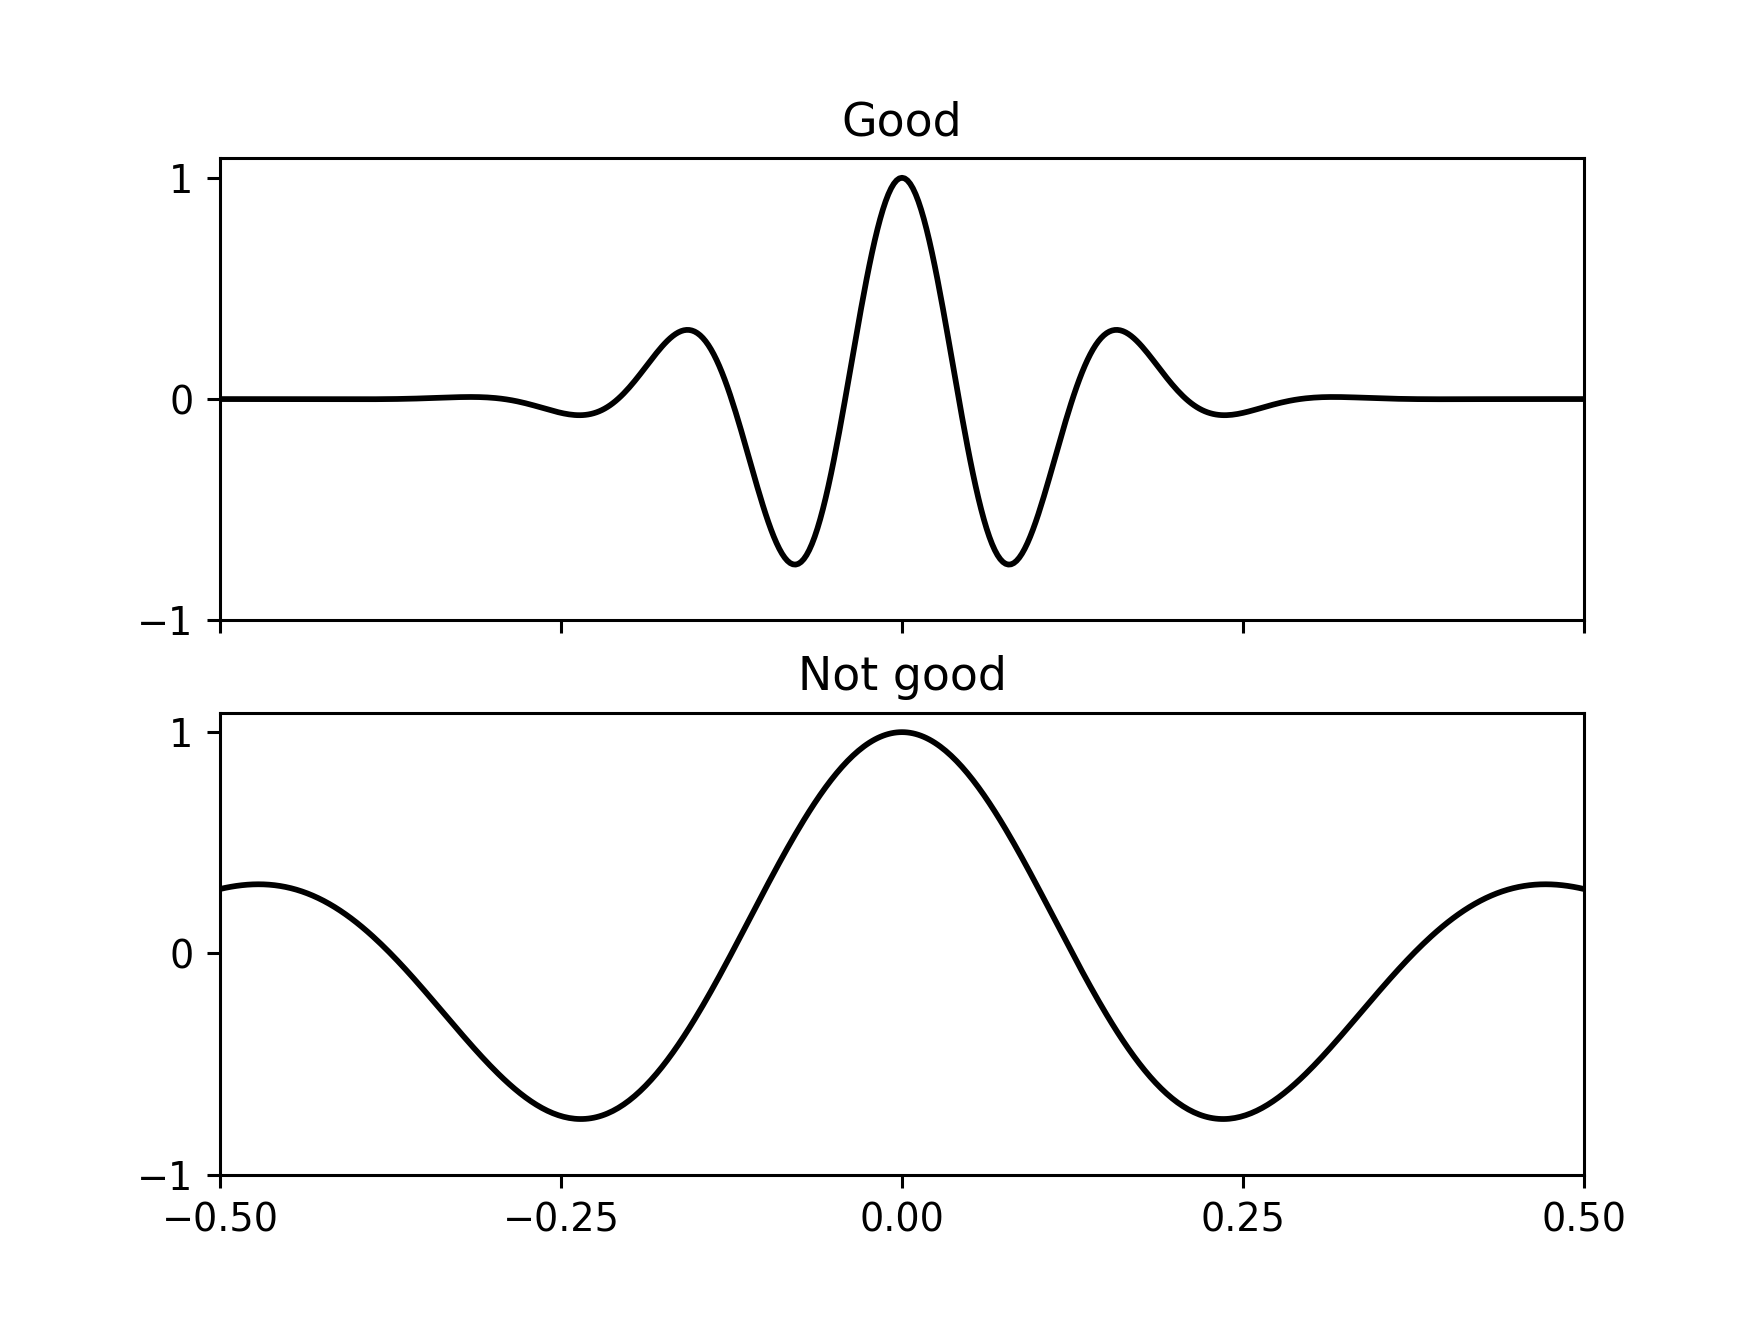

In [11]:
freq = 6
low_freq = 2
srate = 500
time = time_series(srate, start_time=-.5, end_time=.5)
n_cycles = 4

# This wavelet is good because it cleanly tapers off to 0
wavelet_good = get_sine_wave(freq, srate, start_time=-.5, end_time=.5, complex_wave = True) * gauss_win(
    freq, srate, n_cycles, start_time=-.5, end_time=.5)

# This wavelet is bad because it does NOT cleanly taper off to 0
wavelet_bad = get_sine_wave(low_freq, srate, start_time=-.5, end_time=.5, complex_wave = True) * gauss_win(
    low_freq, srate, n_cycles, start_time=-.5, end_time=.5)

iter_wave = [wavelet_good, wavelet_bad]
titles = ['Good', 'Not good']

fig, ax = plt.subplots(nrows=2, sharex=True)

for i in range(len(iter_wave)):
    ax[i].plot(time, np.real(iter_wave[i]), color='black')
    ax[i].set_xlim([-.5, .5])
    ax[i].set_xticks(np.linspace(-.5, .5, 5))
    ax[i].set_yticks(np.linspace(-1, 1, 3))
    ax[i].set_title(titles[i])

### Figure 13.13

<IPython.core.display.Javascript object>


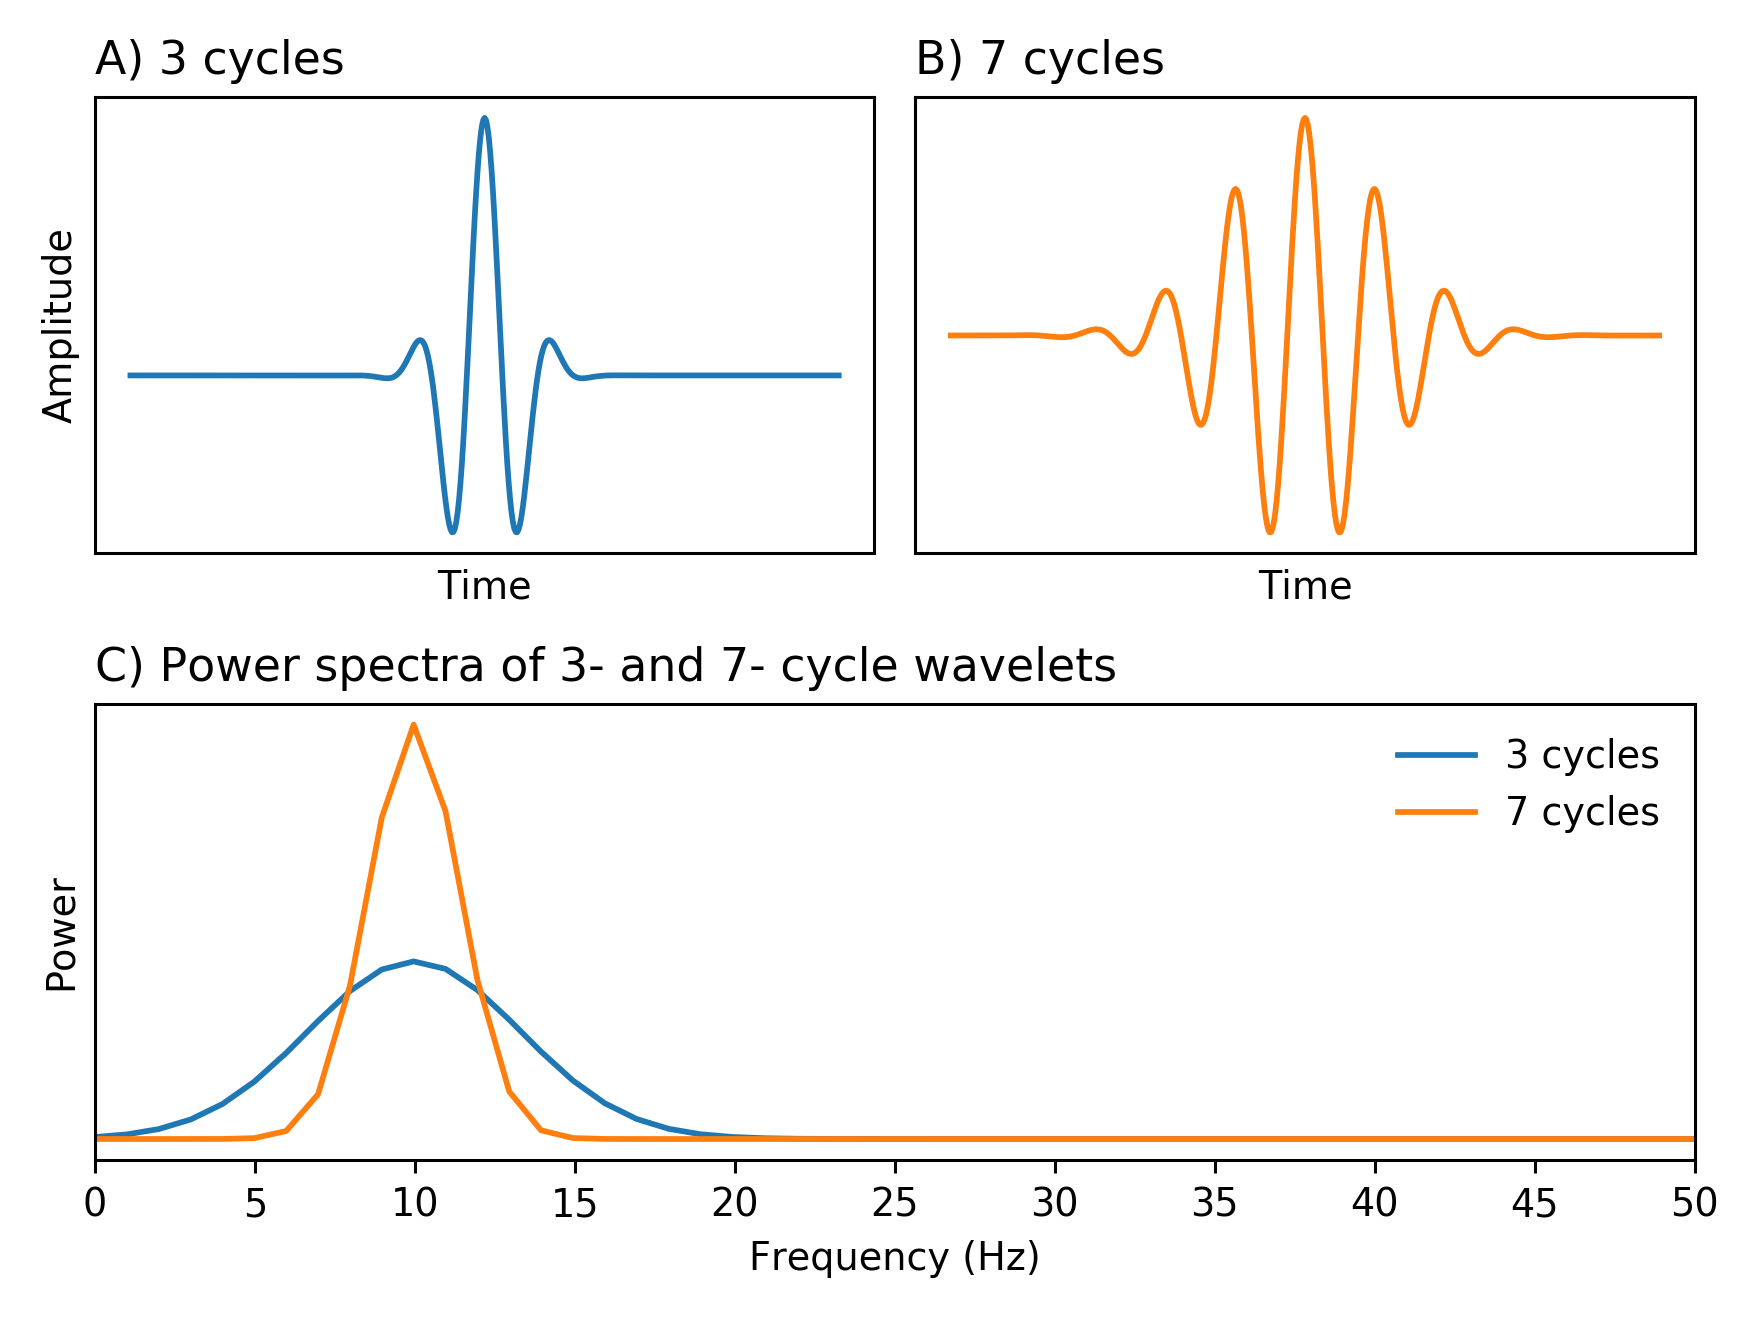

In [12]:
freq = 10
n_cycles = [3, 7]

# Set the figure and grid
fig = plt.figure()
full_grid = fig.add_gridspec(2, 2)

# Set the subgrids
grid_A = full_grid[0, :].subgridspec(1, 2)
grid_B = full_grid[1, :].subgridspec(1, 2)
colors = ['C0', 'C1']

for i in range(len(n_cycles)):
    
    wavelet = get_sine_wave(freq, srate, start_time=-.5, end_time=.5, complex_wave = True) * gauss_win(
        freq, srate, n_cycles[i], start_time=-.5, end_time=.5)
    
    ax_A = fig.add_subplot(grid_A[0, i])
    ax_A.plot(time, np.real(wavelet), color=colors[i])
    ax_A.set_xticks([])
    ax_A.set_yticks([])
    ax_A.set_xlabel('Time')
    ax_A.set_title(pos_to_char(i) + ') ' + str(n_cycles[i]) + ' cycles', loc='left')
    
    if i == 0:
        ax_A.set_ylabel('Amplitude')
        
        ax_B = fig.add_subplot(grid_B[0, :])
        ax_B.set_xlim([0, 50])
        ax_B.set_xticks(np.linspace(0, 50, 11))
        ax_B.set_yticks([])
        ax_B.set_xlabel('Frequency (Hz)')
        ax_B.set_ylabel('Power')
        ax_B.set_title('C) Power spectra of ' + str(n_cycles[0]) + '- and ' + str(n_cycles[1]) + '- cycle wavelets',
                      loc = 'left')
    
    # Compute power
    fft_wave = 2 * np.abs(np.fft.fft(wavelet))
    hz_wave  = np.linspace(0, srate/2, round(len(wavelet) / 2) + 2)
    ax_B.plot(hz_wave, fft_wave[:len(hz_wave)], color=colors[i])

ax_B.legend(labels=[str(n_cycles[0]) + ' cycles', str(n_cycles[1]) + ' cycles'], frameon=False)
fig.tight_layout()

### Figure 13.15

<IPython.core.display.Javascript object>


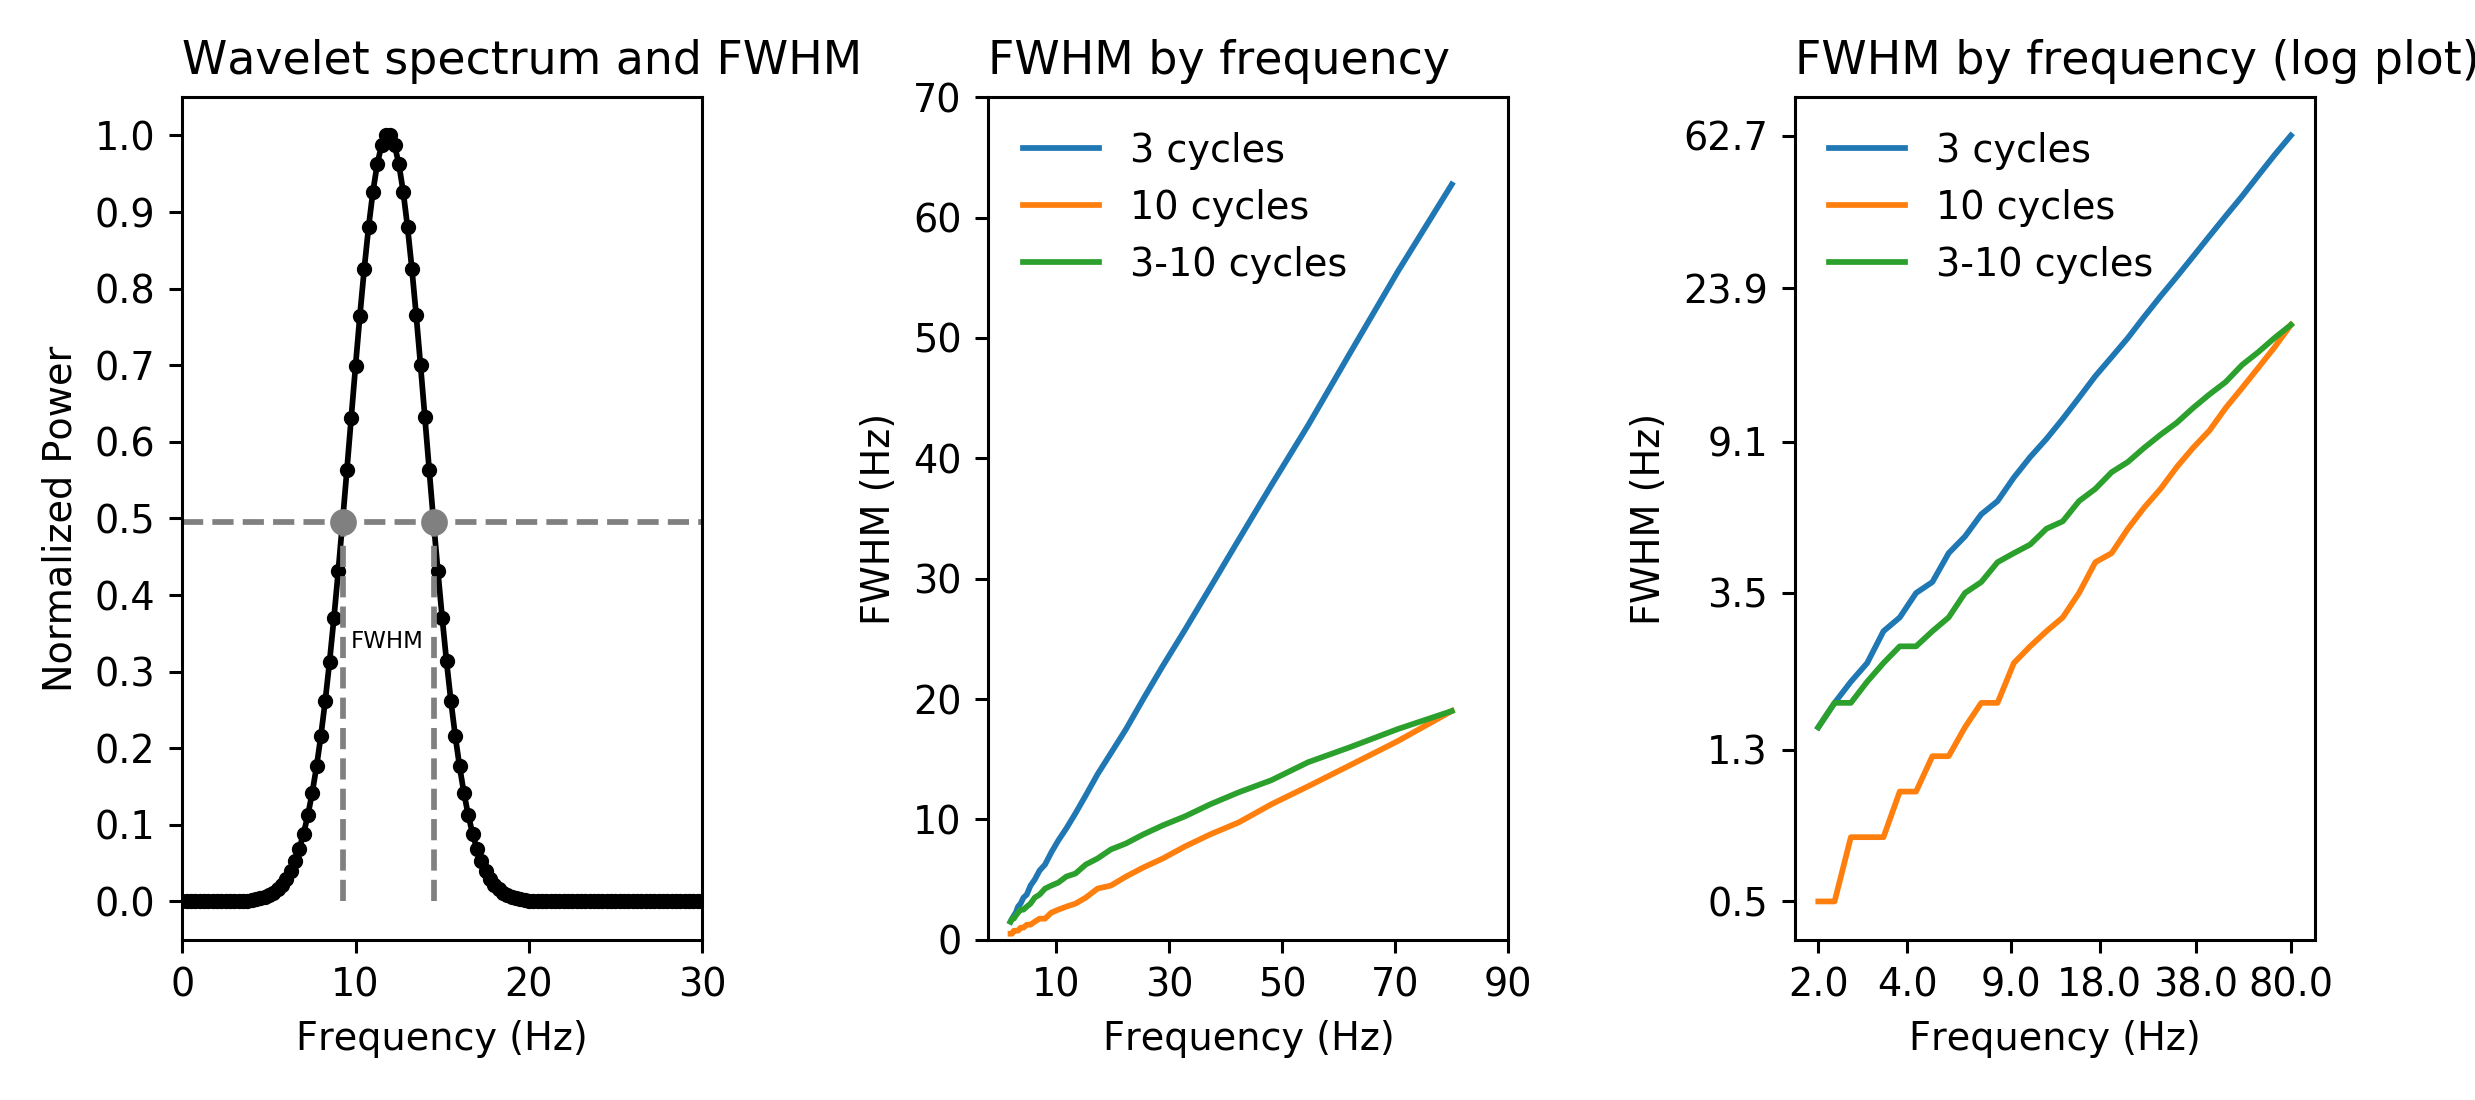

In [13]:
# Avoid log10 warning
np.seterr(divide='ignore')

time = time_series(srate, start_time=-2, end_time=2)
n = len(time)
hz = np.linspace(0, srate // 2, floor(n // 2) + 1)
fwhm = np.zeros([3, len(freqs)])

titles = ['Wavelet spectrum and FWHM', 'FWHM by frequency', 'FWHM by frequency (log plot)']
labs = ['3 cycles', '10 cycles', '3-10 cycles']

fig, ax = plt.subplots(ncols=3, figsize=(9,4))

for i in range(3):
    
    if i == 0:
        n_cycles = np.repeat(3, len(freqs))
    elif i == 1:
        n_cycles = np.repeat(10, len(freqs))
    else:
        n_cycles = np.logspace(np.log10(3), np.log10(10), len(freqs))
    
    for j in range(len(freqs)):
        
        wavelet = get_sine_wave(freqs[j], srate, start_time=-2, end_time=2, complex_wave=True) * gauss_win(
            freqs[j], srate, n_cycles[j], start_time=-2, end_time=2)
        
        # FFT the wavelet
        temp_fft_wave = np.fft.fft(wavelet)
        # Compute power (scalar multiple of two instead of squared)
        temp_fft_wave = np.abs(temp_fft_wave[:len(hz)]) * 2
        # Normalize power to 0-1
        fft_wave = np.subtract(temp_fft_wave, np.min(temp_fft_wave)) / np.max(temp_fft_wave)
        
        # Find grand max, min of left and right 1/2
        peak_x = np.argmax(fft_wave)
        left_5 = np.argmin(np.abs(fft_wave[:peak_x] - .5))
        temp_right_5 = np.argmin(np.abs(fft_wave[peak_x:] - .5))
        right_5 = temp_right_5 + peak_x
        
        # Store result in full width at half maximum
        fwhm[i, j] = hz[right_5] - hz[left_5]
        
        # Plot one example of a wavelet's power spectrum and fwhm
        if i == 2 and j == (ceil(len(freqs)) / 2) - 1:
            
            ax[0].plot(hz, fft_wave, color='black', marker='.')
            ax[0].plot(hz[left_5], fft_wave[left_5], color='grey', marker='.', markersize=12)
            ax[0].plot(hz[right_5], fft_wave[right_5], color='grey', marker='.', markersize=12)
            ax[0].plot([hz[left_5], hz[left_5]], [0, fft_wave[left_5]], color='grey', linestyle='dashed')
            ax[0].plot([hz[right_5], hz[right_5]], [0, fft_wave[right_5]], color='grey', linestyle='dashed')
            ax[0].axhline(np.mean([fft_wave[left_5], fft_wave[right_5]]), color='grey', linestyle='dashed')
            ax[0].set_xlim([0, 30])
            ax[0].set_yticks(np.linspace(0, 1, 11))
            ax[0].set_ylabel('Normalized Power')
            ax[0].text(x=hz[left_5] + .5, y=np.mean([fft_wave[left_5], fft_wave[right_5]]) / 1.5, 
                                               s='FWHM', fontsize=6)

    ax[1].plot(freqs, fwhm[i, :])
    ax[1].set_xticks(np.linspace(10, 90, 5))
    ax[1].set_ylim([0, 70])
    ax[1].set_ylabel('FWHM (Hz)')
    ax[1].legend(labels=labs, frameon=False)
    
min_fwhm = np.min(fwhm)
log_x_ticks = np.round(np.logspace(np.log10(freqs[0]), np.log10(freqs[-1]), 6))
log_y_ticks = np.round(10 * np.logspace(np.log10(min_fwhm), np.log10(np.max(fwhm)), 6)) / 10

for i in range(3):
    ax[2].plot(freqs, fwhm[i, :])
    ax[i].set_xlabel('Frequency (Hz)')
    ax[i].set_title(titles[i], loc='left')

ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xticks(log_x_ticks)
ax[2].set_xticklabels(log_x_ticks)
ax[2].set_yticks(log_y_ticks)
ax[2].set_yticklabels(log_y_ticks)
ax[2].set_ylabel('FWHM (Hz)')
ax[2].legend(labels=labs, frameon=False)

fig.tight_layout()